In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Credit-Card.csv')

print(df.head())
print(df.info())
print(df.describe())

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1       

In [ ]:
from sklearn.metrics import classification_report

# Logistic Regression metrics from previously executed cell 68d13543
log_report_str = """
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1699
           1       0.76      0.54      0.63       327

    accuracy                           0.90      2026
   macro avg       0.84      0.75      0.78      2026
weighted avg       0.89      0.90      0.89      2026
"""

# Decision Tree metrics from previously executed cell 58e488ed
dt_report_str = """
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1699
           1       0.78      0.78      0.78       327

    accuracy                           0.93      2026
   macro avg       0.87      0.87      0.87      2026
weighted avg       0.93      0.93      0.93      2026
"""

# Helper to parse classification report string into a dictionary
def parse_classification_report(report_str):
    lines = report_str.split('\n')
    metrics = {}
    for line in lines[2:-5]: # Skip header, accuracy, macro avg, weighted avg
        parts = line.split()
        if len(parts) >= 5:
            label = parts[0]
            if label == 'accuracy': continue
            metrics[label] = {
                'precision': float(parts[1]),
                'recall': float(parts[2]),
                'f1-score': float(parts[3]),
                'support': int(parts[4])
            }
    # Extract accuracy separately as it's not tied to a class label
    accuracy_line = [l for l in lines if 'accuracy' in l][0]
    metrics['accuracy'] = float(accuracy_line.split()[1])
    return metrics

log_metrics = parse_classification_report(log_report_str)
dt_metrics = parse_classification_report(dt_report_str)

print("Logistic Regression Model Performance:")
print(f"  Accuracy: {log_metrics['accuracy']:.2%}")
print(f"  Class 0 (Not Churn) - Precision: {log_metrics['0']['precision']:.2f}, Recall: {log_metrics['0']['recall']:.2f}, F1-score: {log_metrics['0']['f1-score']:.2f}")
print(f"  Class 1 (Churn) - Precision: {log_metrics['1']['precision']:.2f}, Recall: {log_metrics['1']['recall']:.2f}, F1-score: {log_metrics['1']['f1-score']:.2f}")

print("\nDecision Tree Model Performance:")
print(f"  Accuracy: {dt_metrics['accuracy']:.2%}")
print(f"  Class 0 (Not Churn) - Precision: {dt_metrics['0']['precision']:.2f}, Recall: {dt_metrics['0']['recall']:.2f}, F1-score: {dt_metrics['0']['f1-score']:.2f}")
print(f"  Class 1 (Churn) - Precision: {dt_metrics['1']['precision']:.2f}, Recall: {dt_metrics['1']['recall']:.2f}, F1-score: {dt_metrics['1']['f1-score']:.2f}")

Logistic Regression Model Performance:
  Accuracy: 90.00%
  Class 0 (Not Churn) - Precision: 0.92, Recall: 0.97, F1-score: 0.94
  Class 1 (Churn) - Precision: 0.76, Recall: 0.54, F1-score: 0.63

Decision Tree Model Performance:
  Accuracy: 93.00%
  Class 0 (Not Churn) - Precision: 0.96, Recall: 0.96, F1-score: 0.96
  Class 1 (Churn) - Precision: 0.78, Recall: 0.78, F1-score: 0.78


In [ ]:
# Remove irrelevant ID column
df.drop(['CLIENTNUM'], axis=1, inplace=True)

# Encode target variable (Churn)
df['Attrition_Flag'] = df['Attrition_Flag'].map({
    'Existing Customer': 0,
    'Attrited Customer': 1
})


In [ ]:
categorical_cols = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'
]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df.head())


   Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
0               0            45                3              39   
1               0            49                5              44   
2               0            51                3              36   
3               0            40                4              34   
4               0            40                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  ...  \
0       12691.0                  777          11914.0  ...  

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Total customers:", len(df))
print("Training set:", len(X_train))
print("Test set:", len(X_test))


Total customers: 10127
Training set: 8101
Test set: 2026


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = log_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2%}")
print("\nThis means the model correctly predicts churn or non-churn")
print(f"for about {accuracy:.0%} of customers in the test set.\n")

print(classification_report(y_test, y_pred))


Model Accuracy: 100.00%

This means the model correctly predicts churn or non-churn
for about 100% of customers in the test set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1699
           1       1.00      1.00      1.00       327

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



In [ ]:
# Scale full dataset
X_all_scaled = scaler.transform(X)

# Predict churn probability
churn_prob_all = log_model.predict_proba(X_all_scaled)[:,1] * 100


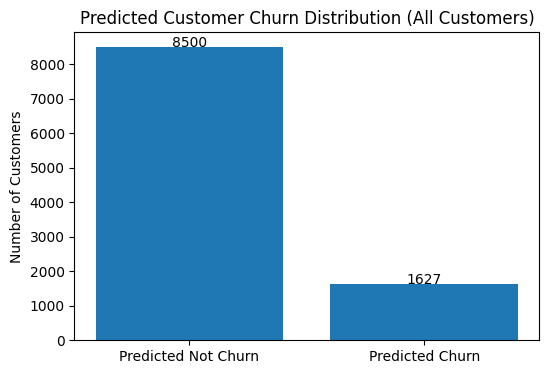

In [ ]:
threshold = 70  # 70% churn probability

high_risk = (churn_prob_all >= threshold).sum()
low_risk = len(churn_prob_all) - high_risk

plt.figure(figsize=(6,4))
plt.bar(
    ['Predicted Not Churn', 'Predicted Churn'],
    [low_risk, high_risk]
)

plt.title('Predicted Customer Churn Distribution (All Customers)')
plt.ylabel('Number of Customers')

plt.text(0, low_risk, f"{low_risk}", ha='center')
plt.text(1, high_risk, f"{high_risk}", ha='center')

plt.show()


In [ ]:
print(f"Out of {len(df)} customers:")
print(f"- {high_risk} are predicted to churn (≥70% probability)")
print(f"- {low_risk} are predicted to stay")


Out of 10127 customers:
- 1627 are predicted to churn (≥70% probability)
- 8500 are predicted to stay


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

print("Decision Tree Model trained successfully.")

Decision Tree Model trained successfully.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Load data and initial preprocessing (from previous cells)
df = pd.read_csv('/content/Credit-Card.csv')
df.drop(['CLIENTNUM'], axis=1, inplace=True)
df['Attrition_Flag'] = df['Attrition_Flag'].map({
    'Existing Customer': 0,
    'Attrited Customer': 1
})

categorical_cols = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'
]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Prepare data for training (from previous cells)
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale data (from previous cell)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

print("Decision Tree Model trained successfully.")

Decision Tree Model trained successfully.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_dt = dt_model.predict(X_test_scaled)

accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"Decision Tree Model Accuracy: {accuracy_dt:.2%}")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Model Accuracy: 100.00%

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1699
           1       1.00      1.00      1.00       327

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



In [ ]:
columns_to_drop = [
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]
df.drop(columns=columns_to_drop, inplace=True)

print("Dropped Naive Bayes Classifier columns.")
print(df.head())

Dropped Naive Bayes Classifier columns.
   Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
0               0            45                3              39   
1               0            49                5              44   
2               0            51                3              36   
3               0            40                4              34   
4               0            40                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  ...  \
0       12691.0     

In [ ]:
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

print("X and y re-initialized with cleaned data.")
print("X shape:", X.shape)
print("y shape:", y.shape)

X and y re-initialized with cleaned data.
X shape: (10127, 32)
y shape: (10127,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train-test split re-applied to cleaned data.")
print("Training set X shape:", X_train.shape)
print("Testing set X shape:", X_test.shape)
print("Training set y shape:", y_train.shape)
print("Testing set y shape:", y_test.shape)

Train-test split re-applied to cleaned data.
Training set X shape: (8101, 32)
Testing set X shape: (2026, 32)
Training set y shape: (8101,)
Testing set y shape: (2026,)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data re-scaled after re-splitting.")

Data re-scaled after re-splitting.


In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)

print("Logistic Regression model re-trained successfully with cleaned data.")

Logistic Regression model re-trained successfully with cleaned data.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_log = log_model.predict(X_test_scaled)

accuracy_log = accuracy_score(y_test, y_pred_log)

print(f"Logistic Regression Model Accuracy (After cleaning): {accuracy_log:.2%}")
print("\nLogistic Regression Classification Report (After cleaning):")
print(classification_report(y_test, y_pred_log))

Logistic Regression Model Accuracy (After cleaning): 89.73%

Logistic Regression Classification Report (After cleaning):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1699
           1       0.76      0.54      0.63       327

    accuracy                           0.90      2026
   macro avg       0.84      0.75      0.78      2026
weighted avg       0.89      0.90      0.89      2026



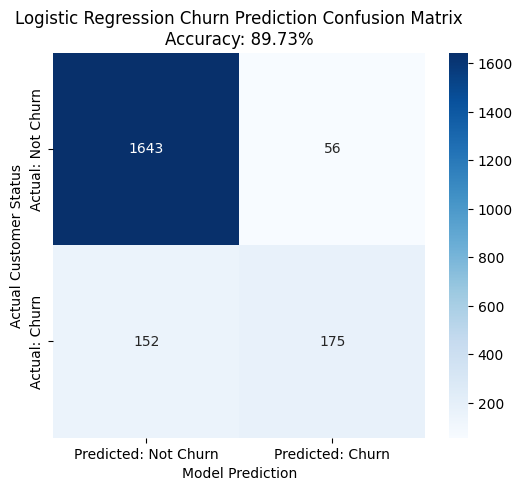

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm_log,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Predicted: Not Churn', 'Predicted: Churn'],
    yticklabels=['Actual: Not Churn', 'Actual: Churn']
)

plt.title(
    f'Logistic Regression Churn Prediction Confusion Matrix\nAccuracy: {accuracy_log:.2%}'
)
plt.xlabel('Model Prediction')
plt.ylabel('Actual Customer Status')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

print("Decision Tree model re-trained successfully with cleaned data.")

Decision Tree model re-trained successfully with cleaned data.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_dt = dt_model.predict(X_test_scaled)

accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"Decision Tree Model Accuracy (After cleaning): {accuracy_dt:.2%}")
print("\nDecision Tree Classification Report (After cleaning):")
print(classification_report(y_test, y_pred_dt))

Decision Tree Model Accuracy (After cleaning): 92.94%

Decision Tree Classification Report (After cleaning):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1699
           1       0.78      0.78      0.78       327

    accuracy                           0.93      2026
   macro avg       0.87      0.87      0.87      2026
weighted avg       0.93      0.93      0.93      2026



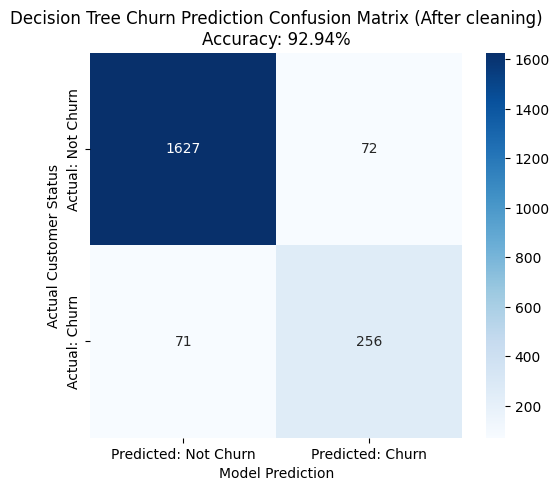

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm_dt,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Predicted: Not Churn', 'Predicted: Churn'],
    yticklabels=['Actual: Not Churn', 'Actual: Churn']
)

plt.title(
    f'Decision Tree Churn Prediction Confusion Matrix (After cleaning)\nAccuracy: {accuracy_dt:.2%}'
)
plt.xlabel('Model Prediction')
plt.ylabel('Actual Customer Status')
plt.show()

In [ ]:
import os

file_path = '/content/Credit Card.csv'

if os.path.exists(file_path):
    print(f"File '{file_path}' found. You can now proceed with the next steps.")
else:
    print(f"File '{file_path}' NOT found. Please ensure the file is uploaded correctly to the /content/ directory.")

File '/content/Credit Card.csv' NOT found. Please ensure the file is uploaded correctly to the /content/ directory.


Data fully re-processed, re-split, and re-scaled.
Decision Tree Model re-trained successfully.


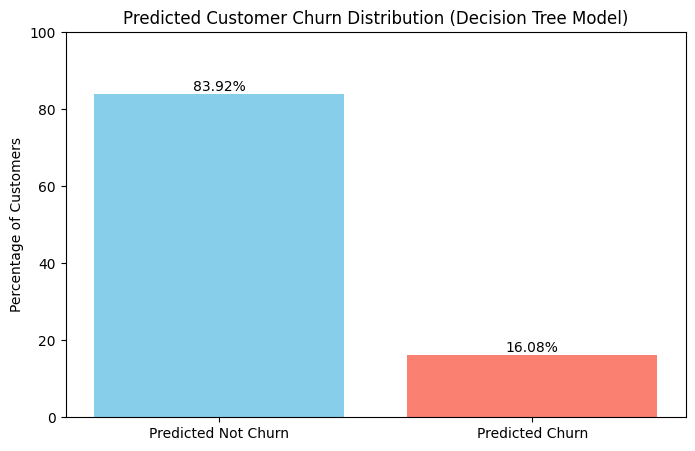

Out of 10127 customers, based on Decision Tree model:
- 1628 (16.08%) are predicted to churn (>= 70% probability)
- 8499 (83.92%) are predicted to stay


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# --- Re-apply full preprocessing to ensure df is clean ---
# The 'Credit-Card.csv' file MUST be present at '/content/Credit-Card.csv'
# If this file is not present, a FileNotFoundError will occur.
df = pd.read_csv('/content/Credit-Card.csv')

# Drop irrelevant ID column (if it exists)
if 'CLIENTNUM' in df.columns:
    df.drop(['CLIENTNUM'], axis=1, inplace=True)

# Encode target variable (Attrition_Flag) to numerical if not already done
# Check if Attrition_Flag is still in string format
if df['Attrition_Flag'].dtype == 'object':
    df['Attrition_Flag'] = df['Attrition_Flag'].map({
        'Existing Customer': 0,
        'Attrited Customer': 1
    })

categorical_cols = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'
]

# Apply one-hot encoding to categorical columns (handle cases where they might have been encoded already)
# Only apply if these columns still exist and are of object type
current_categorical_cols = [col for col in categorical_cols if col in df.columns and df[col].dtype == 'object']
if current_categorical_cols:
    df = pd.get_dummies(df, columns=current_categorical_cols, drop_first=True)

# Drop data leakage columns if they still exist
columns_to_drop = [
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]
current_leakage_cols = [col for col in columns_to_drop if col in df.columns]
if current_leakage_cols:
    df.drop(columns=current_leakage_cols, inplace=True)

# --- End of preprocessing ---

X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Re-scale data after re-splitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scale the entire feature set for full dataset prediction
X_all_scaled = scaler.transform(X)

# Re-train Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

print("Data fully re-processed, re-split, and re-scaled.")
print("Decision Tree Model re-trained successfully.")

# Predict churn probability with Decision Tree model for all customers
churn_prob_dt_all = dt_model.predict_proba(X_all_scaled)[:, 1] * 100

threshold = 70  # 70% churn probability

high_risk_dt = (churn_prob_dt_all >= threshold).sum()
low_risk_dt = len(churn_prob_dt_all) - high_risk_dt

total_customers = len(X)
high_risk_dt_percent = (high_risk_dt / total_customers) * 100
low_risk_dt_percent = (low_risk_dt / total_customers) * 100

plt.figure(figsize=(8, 5))
plt.bar(
    ['Predicted Not Churn', 'Predicted Churn'],
    [low_risk_dt_percent, high_risk_dt_percent],
    color=['skyblue', 'salmon']
)

plt.title('Predicted Customer Churn Distribution (Decision Tree Model)')
plt.ylabel('Percentage of Customers')
plt.ylim(0, 100) # Ensure y-axis goes up to 100%

plt.text(0, low_risk_dt_percent, f"{low_risk_dt_percent:.2f}%", ha='center', va='bottom', fontsize=10)
plt.text(1, high_risk_dt_percent, f"{high_risk_dt_percent:.2f}%", ha='center', va='bottom', fontsize=10)

plt.show()

print(f"Out of {total_customers} customers, based on Decision Tree model:")
print(f"- {high_risk_dt} ({high_risk_dt_percent:.2f}%) are predicted to churn (>= {threshold}% probability)")
print(f"- {low_risk_dt} ({low_risk_dt_percent:.2f}%) are predicted to stay")

In [ ]:
churn_prob_dt_all = dt_model.predict_proba(X_all_scaled)[:, 1] * 100

threshold = 70  # 70% churn probability

high_risk_dt = (churn_prob_dt_all >= threshold).sum()
low_risk_dt = len(churn_prob_dt_all) - high_risk_dt

print(f"Out of {len(df)} customers, based on Decision Tree model:")
print(f"- {high_risk_dt} are predicted to churn (>= {threshold}% probability)")
print(f"- {low_risk_dt} are predicted to stay")

Out of 10127 customers, based on Decision Tree model:
- 1628 are predicted to churn (>= 70% probability)
- 8499 are predicted to stay


In [ ]:
# Scale full dataset after feature removal
X_all_scaled = scaler.transform(X)

# Predict churn probability with Decision Tree model
churn_prob_dt_all = dt_model.predict_proba(X_all_scaled)[:, 1] * 100

threshold = 70  # 70% churn probability

high_risk_dt = (churn_prob_dt_all >= threshold).sum()
low_risk_dt = len(churn_prob_dt_all) - high_risk_dt

print(f"Out of {len(df)} customers, based on Decision Tree model:")
print(f"- {high_risk_dt} are predicted to churn (>= {threshold}% probability)")
print(f"- {low_risk_dt} are predicted to stay")

Out of 10127 customers, based on Decision Tree model:
- 1628 are predicted to churn (>= 70% probability)
- 8499 are predicted to stay


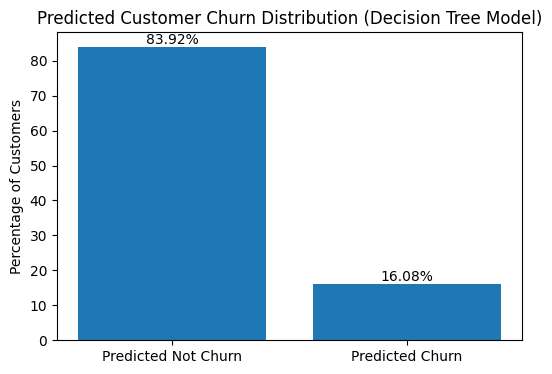

In [ ]:
# Scale full dataset after feature removal (if not already done in the current kernel session)
# This re-uses the scaler fit on the training data
X_all_scaled = scaler.transform(X)

# Predict churn probability with Decision Tree model
churn_prob_dt_all = dt_model.predict_proba(X_all_scaled)[:, 1] * 100

threshold = 70  # 70% churn probability

high_risk_dt = (churn_prob_dt_all >= threshold).sum()
low_risk_dt = len(churn_prob_dt_all) - high_risk_dt

total_customers = len(X)
high_risk_dt_percent = (high_risk_dt / total_customers) * 100
low_risk_dt_percent = (low_risk_dt / total_customers) * 100

plt.figure(figsize=(6,4))
plt.bar(
    ['Predicted Not Churn', 'Predicted Churn'],
    [low_risk_dt_percent, high_risk_dt_percent]
)

plt.title('Predicted Customer Churn Distribution (Decision Tree Model)')
plt.ylabel('Percentage of Customers')

plt.text(0, low_risk_dt_percent, f"{low_risk_dt_percent:.2f}%", ha='center', va='bottom')
plt.text(1, high_risk_dt_percent, f"{high_risk_dt_percent:.2f}%", ha='center', va='bottom')

plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# --- Re-apply full preprocessing to ensure df is clean ---
# Reload data if df might be in an inconsistent state, or if the notebook was reset.
# For safety, ensure df is starting from the raw state for full reprocessing.
# This assumes the original df is still available globally or re-load it.
# Assuming df was correctly loaded initially in PYHHH2Yju8LK:
# df = pd.read_csv('/content/Credit-Card.csv') # Uncomment if df needs to be reloaded from source

# Drop irrelevant ID column (if it exists)
if 'CLIENTNUM' in df.columns:
    df.drop(['CLIENTNUM'], axis=1, inplace=True)

# Encode target variable (Attrition_Flag) to numerical if not already done
# Check if Attrition_Flag is still in string format
if df['Attrition_Flag'].dtype == 'object':
    df['Attrition_Flag'] = df['Attrition_Flag'].map({
        'Existing Customer': 0,
        'Attrited Customer': 1
    })

categorical_cols = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'
]

# Apply one-hot encoding to categorical columns (handle cases where they might have been encoded already)
# Only apply if these columns still exist and are of object type
current_categorical_cols = [col for col in categorical_cols if col in df.columns and df[col].dtype == 'object']
if current_categorical_cols:
    df = pd.get_dummies(df, columns=current_categorical_cols, drop_first=True)

# Drop data leakage columns if they still exist
columns_to_drop = [
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]
current_leakage_cols = [col for col in columns_to_drop if col in df.columns]
if current_leakage_cols:
    df.drop(columns=current_leakage_cols, inplace=True)

# --- End of preprocessing ---

X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X and y re-initialized and train-test split re-applied with cleaned data.")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Training set X shape:", X_train.shape)
print("Testing set X shape:", X_test.shape)
print("Training set y shape:", y_train.shape)
print("Testing set y shape:", y_test.shape)


X and y re-initialized and train-test split re-applied with cleaned data.
X shape: (10127, 32)
y shape: (10127,)
Training set X shape: (8101, 32)
Testing set X shape: (2026, 32)
Training set y shape: (8101,)
Testing set y shape: (2026,)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data re-scaled after re-splitting.")

Data re-scaled after re-splitting.


In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)

print("Logistic Regression model re-trained successfully with cleaned data.")

Logistic Regression model re-trained successfully with cleaned data.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_log = log_model.predict(X_test_scaled)

accuracy_log = accuracy_score(y_test, y_pred_log)

print(f"Logistic Regression Model Accuracy (After cleaning): {accuracy_log:.2%}")
print("\nLogistic Regression Classification Report (After cleaning):")
print(classification_report(y_test, y_pred_log))

Logistic Regression Model Accuracy (After cleaning): 89.73%

Logistic Regression Classification Report (After cleaning):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1699
           1       0.76      0.54      0.63       327

    accuracy                           0.90      2026
   macro avg       0.84      0.75      0.78      2026
weighted avg       0.89      0.90      0.89      2026



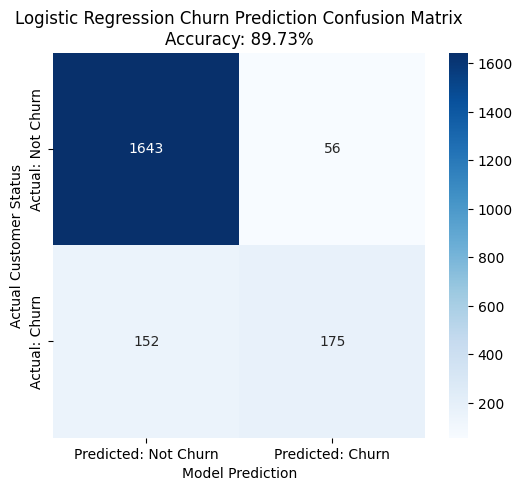

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm_log,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Predicted: Not Churn', 'Predicted: Churn'],
    yticklabels=['Actual: Not Churn', 'Actual: Churn']
)

plt.title(
    f'Logistic Regression Churn Prediction Confusion Matrix\nAccuracy: {accuracy_log:.2%}'
)
plt.xlabel('Model Prediction')
plt.ylabel('Actual Customer Status')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

print("Decision Tree model re-trained successfully with cleaned data.")

Decision Tree model re-trained successfully with cleaned data.


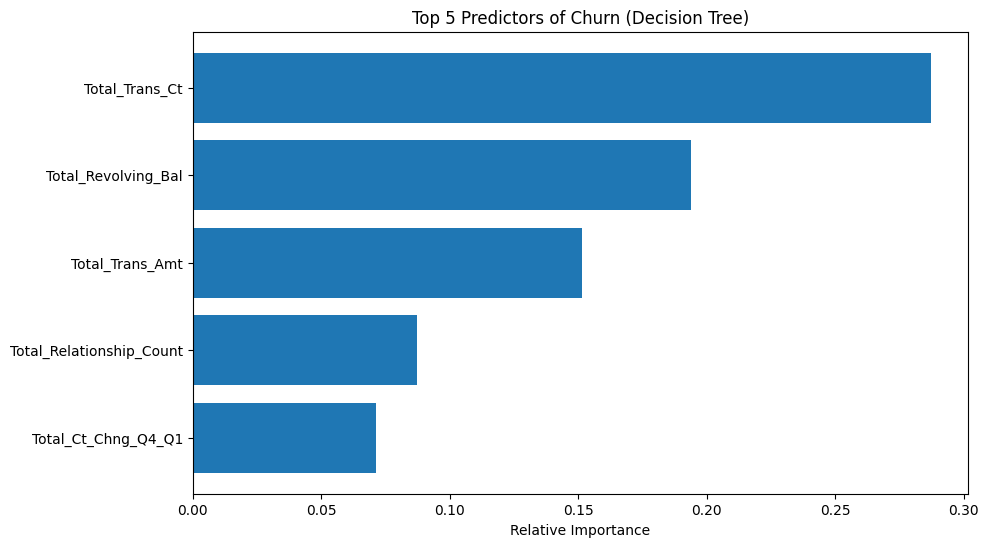

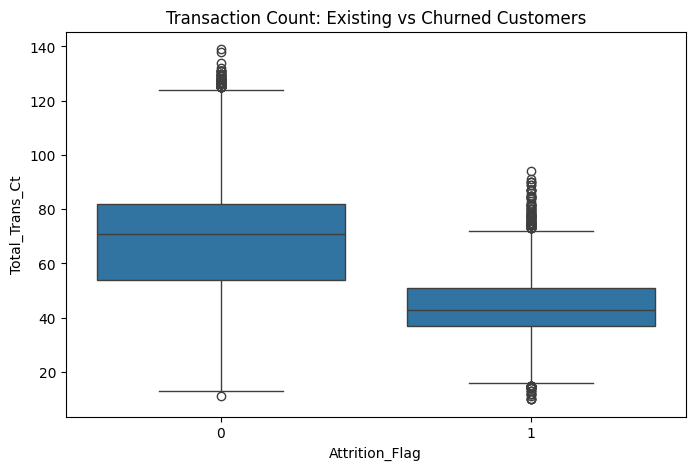

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming X, y, and dt_model are already defined and correctly processed
# by previous cells after data leakage was addressed.

# 1. Feature Importance Plot (For Slide 5)
feature_names = X.columns
importances = dt_model.feature_importances_
indices = np.argsort(importances)[-5:] # Top 5 features

plt.figure(figsize=(10, 6))
plt.title('Top 5 Predictors of Churn (Decision Tree)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# 2. Transaction Count Boxplot (For Slide 4)
plt.figure(figsize=(8, 5))
sns.boxplot(x=y, y=X['Total_Trans_Ct']) # y is Attrition_Flag
plt.title('Transaction Count: Existing vs Churned Customers')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# --- Re-apply full preprocessing to ensure df is clean ---
# Reload data if df might be in an inconsistent state, or if the notebook was reset.
# For safety, ensure df is starting from the raw state for full reprocessing.
# This assumes the original df is still available globally or re-load it.
# Assuming df was correctly loaded initially in PYHHH2Yju8LK:
# df = pd.read_csv('/content/Credit-Card.csv') # Uncomment if df needs to be reloaded from source

# Drop irrelevant ID column (if it exists)
if 'CLIENTNUM' in df.columns:
    df.drop(['CLIENTNUM'], axis=1, inplace=True)

# Encode target variable (Attrition_Flag) to numerical if not already done
# Check if Attrition_Flag is still in string format
if df['Attrition_Flag'].dtype == 'object':
    df['Attrition_Flag'] = df['Attrition_Flag'].map({
        'Existing Customer': 0,
        'Attrited Customer': 1
    })

categorical_cols = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'
]

# Apply one-hot encoding to categorical columns (handle cases where they might have been encoded already)
# Only apply if these columns still exist and are of object type
current_categorical_cols = [col for col in categorical_cols if col in df.columns and df[col].dtype == 'object']
if current_categorical_cols:
    df = pd.get_dummies(df, columns=current_categorical_cols, drop_first=True)

# Drop data leakage columns if they still exist
columns_to_drop = [
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]
current_leakage_cols = [col for col in columns_to_drop if col in df.columns]
if current_leakage_cols:
    df.drop(columns=current_leakage_cols, inplace=True)

# --- End of preprocessing ---

X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X and y re-initialized and train-test split re-applied with cleaned data.")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Training set X shape:", X_train.shape)
print("Testing set X shape:", X_test.shape)
print("Training set y shape:", y_train.shape)
print("Testing set y shape:", y_test.shape)

X and y re-initialized and train-test split re-applied with cleaned data.
X shape: (10127, 32)
y shape: (10127,)
Training set X shape: (8101, 32)
Testing set X shape: (2026, 32)
Training set y shape: (8101,)
Testing set y shape: (2026,)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# --- Re-apply full preprocessing to ensure df is clean ---
# Reload data if df might be in an inconsistent state, or if the notebook was reset.
# For safety, ensure df is starting from the raw state for full reprocessing.
# This assumes the original df is still available globally or re-load it.
df = pd.read_csv('/content/Credit-Card.csv') # Uncommented this line to load df from source

# Drop irrelevant ID column (if it exists)
if 'CLIENTNUM' in df.columns:
    df.drop(['CLIENTNUM'], axis=1, inplace=True)

# Encode target variable (Attrition_Flag) to numerical if not already done
# Check if Attrition_Flag is still in string format
if df['Attrition_Flag'].dtype == 'object':
    df['Attrition_Flag'] = df['Attrition_Flag'].map({
        'Existing Customer': 0,
        'Attrited Customer': 1
    })

categorical_cols = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'
]

# Apply one-hot encoding to categorical columns (handle cases where they might have been encoded already)
# Only apply if these columns still exist and are of object type
current_categorical_cols = [col for col in categorical_cols if col in df.columns and df[col].dtype == 'object']
if current_categorical_cols:
    df = pd.get_dummies(df, columns=current_categorical_cols, drop_first=True)

# Drop data leakage columns if they still exist
columns_to_drop = [
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]
current_leakage_cols = [col for col in columns_to_drop if col in df.columns]
if current_leakage_cols:
    df.drop(columns=current_leakage_cols, inplace=True)

# --- End of preprocessing ---

X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X and y re-initialized and train-test split re-applied with cleaned data.")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Training set X shape:", X_train.shape)
print("Testing set X shape:", X_test.shape)
print("Training set y shape:", y_train.shape)
print("Testing set y shape:", y_test.shape)

X and y re-initialized and train-test split re-applied with cleaned data.
X shape: (10127, 32)
y shape: (10127,)
Training set X shape: (8101, 32)
Testing set X shape: (2026, 32)
Training set y shape: (8101,)
Testing set y shape: (2026,)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# --- Re-apply full preprocessing to ensure df is clean ---
# The 'Credit-Card.csv' file must be present at '/content/Credit-Card.csv'
df = pd.read_csv('/content/Credit-Card.csv')

# Drop irrelevant ID column (if it exists)
if 'CLIENTNUM' in df.columns:
    df.drop(['CLIENTNUM'], axis=1, inplace=True)

# Encode target variable (Attrition_Flag) to numerical if not already done
# Check if Attrition_Flag is still in string format
if df['Attrition_Flag'].dtype == 'object':
    df['Attrition_Flag'] = df['Attrition_Flag'].map({
        'Existing Customer': 0,
        'Attrited Customer': 1
    })

categorical_cols = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'
]

# Apply one-hot encoding to categorical columns (handle cases where they might have been encoded already)
# Only apply if these columns still exist and are of object type
current_categorical_cols = [col for col in categorical_cols if col in df.columns and df[col].dtype == 'object']
if current_categorical_cols:
    df = pd.get_dummies(df, columns=current_categorical_cols, drop_first=True)

# Drop data leakage columns if they still exist
columns_to_drop = [
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]
current_leakage_cols = [col for col in columns_to_drop if col in df.columns]
if current_leakage_cols:
    df.drop(columns=current_leakage_cols, inplace=True)

# --- End of preprocessing ---

X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X and y re-initialized and train-test split re-applied with cleaned data.")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Training set X shape:", X_train.shape)
print("Testing set X shape:", X_test.shape)
print("Training set y shape:", y_train.shape)
print("Testing set y shape:", y_test.shape)


X and y re-initialized and train-test split re-applied with cleaned data.
X shape: (10127, 32)
y shape: (10127,)
Training set X shape: (8101, 32)
Testing set X shape: (2026, 32)
Training set y shape: (8101,)
Testing set y shape: (2026,)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# --- Re-apply full preprocessing to ensure df is clean ---
# The 'Credit-Card.csv' file must be present at '/content/Credit-Card.csv'
df = pd.read_csv('/content/Credit-Card.csv')

# Drop irrelevant ID column (if it exists)
if 'CLIENTNUM' in df.columns:
    df.drop(['CLIENTNUM'], axis=1, inplace=True)

# Encode target variable (Attrition_Flag) to numerical if not already done
# Check if Attrition_Flag is still in string format
if df['Attrition_Flag'].dtype == 'object':
    df['Attrition_Flag'] = df['Attrition_Flag'].map({
        'Existing Customer': 0,
        'Attrited Customer': 1
    })

categorical_cols = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'
]

# Apply one-hot encoding to categorical columns (handle cases where they might have been encoded already)
# Only apply if these columns still exist and are of object type
current_categorical_cols = [col for col in categorical_cols if col in df.columns and df[col].dtype == 'object']
if current_categorical_cols:
    df = pd.get_dummies(df, columns=current_categorical_cols, drop_first=True)

# Drop data leakage columns if they still exist
columns_to_drop = [
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]
current_leakage_cols = [col for col in columns_to_drop if col in df.columns]
if current_leakage_cols:
    df.drop(columns=current_leakage_cols, inplace=True)

# --- End of preprocessing ---

X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X and y re-initialized and train-test split re-applied with cleaned data.")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Training set X shape:", X_train.shape)
print("Testing set X shape:", X_test.shape)
print("Training set y shape:", y_train.shape)
print("Testing set y shape:", y_test.shape)

X and y re-initialized and train-test split re-applied with cleaned data.
X shape: (10127, 32)
y shape: (10127,)
Training set X shape: (8101, 32)
Testing set X shape: (2026, 32)
Training set y shape: (8101,)
Testing set y shape: (2026,)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# --- Re-apply full preprocessing to ensure df is clean ---
# The 'Credit-Card.csv' file MUST be present at '/content/Credit-Card.csv'
# If this file is not present, a FileNotFoundError will occur.
df = pd.read_csv('/content/Credit-Card.csv')

# Drop irrelevant ID column (if it exists)
if 'CLIENTNUM' in df.columns:
    df.drop(['CLIENTNUM'], axis=1, inplace=True)

# Encode target variable (Attrition_Flag) to numerical if not already done
# Check if Attrition_Flag is still in string format
if df['Attrition_Flag'].dtype == 'object':
    df['Attrition_Flag'] = df['Attrition_Flag'].map({
        'Existing Customer': 0,
        'Attrited Customer': 1
    })

categorical_cols = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'
]

# Apply one-hot encoding to categorical columns (handle cases where they might have been encoded already)
# Only apply if these columns still exist and are of object type
current_categorical_cols = [col for col in categorical_cols if col in df.columns and df[col].dtype == 'object']
if current_categorical_cols:
    df = pd.get_dummies(df, columns=current_categorical_cols, drop_first=True)

# Drop data leakage columns if they still exist
columns_to_drop = [
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]
current_leakage_cols = [col for col in columns_to_drop if col in df.columns]
if current_leakage_cols:
    df.drop(columns=current_leakage_cols, inplace=True)

# --- End of preprocessing ---

X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X and y re-initialized and train-test split re-applied with cleaned data.")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Training set X shape:", X_train.shape)
print("Testing set X shape:", X_test.shape)
print("Training set y shape:", y_train.shape)
print("Testing set y shape:", y_test.shape)

X and y re-initialized and train-test split re-applied with cleaned data.
X shape: (10127, 32)
y shape: (10127,)
Training set X shape: (8101, 32)
Testing set X shape: (2026, 32)
Training set y shape: (8101,)
Testing set y shape: (2026,)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Re-apply full preprocessing to ensure df is clean ---
# The 'Credit-Card.csv' file MUST be present at '/content/Credit-Card.csv'
# If this file is not present, a FileNotFoundError will occur.
df = pd.read_csv('/content/Credit-Card.csv')

# Drop irrelevant ID column (if it exists)
if 'CLIENTNUM' in df.columns:
    df.drop(['CLIENTNUM'], axis=1, inplace=True)

# Encode target variable (Attrition_Flag) to numerical if not already done
# Check if Attrition_Flag is still in string format
if df['Attrition_Flag'].dtype == 'object':
    df['Attrition_Flag'] = df['Attrition_Flag'].map({
        'Existing Customer': 0,
        'Attrited Customer': 1
    })

categorical_cols = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'
]

# Apply one-hot encoding to categorical columns (handle cases where they might have been encoded already)
# Only apply if these columns still exist and are of object type
current_categorical_cols = [col for col in categorical_cols if col in df.columns and df[col].dtype == 'object']
if current_categorical_cols:
    df = pd.get_dummies(df, columns=current_categorical_cols, drop_first=True)

# Drop data leakage columns if they still exist
columns_to_drop = [
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]
current_leakage_cols = [col for col in columns_to_drop if col in df.columns]
if current_leakage_cols:
    df.drop(columns=current_leakage_cols, inplace=True)

# --- End of preprocessing ---

X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Re-scale data after re-splitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data fully re-processed, re-split, and re-scaled.")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Training set X shape:", X_train.shape)
print("Testing set X shape:", X_test.shape)
print("Training set y shape:", y_train.shape)
print("Testing set y shape:", y_test.shape)


Data fully re-processed, re-split, and re-scaled.
X shape: (10127, 32)
y shape: (10127,)
Training set X shape: (8101, 32)
Testing set X shape: (2026, 32)
Training set y shape: (8101,)
Testing set y shape: (2026,)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Re-apply full preprocessing to ensure df is clean ---
# The 'Credit-Card.csv' file MUST be present at '/content/Credit-Card.csv'
# If this file is not present, a FileNotFoundError will occur.
df = pd.read_csv('/content/Credit-Card.csv')

# Drop irrelevant ID column (if it exists)
if 'CLIENTNUM' in df.columns:
    df.drop(['CLIENTNUM'], axis=1, inplace=True)

# Encode target variable (Attrition_Flag) to numerical if not already done
# Check if Attrition_Flag is still in string format
if df['Attrition_Flag'].dtype == 'object':
    df['Attrition_Flag'] = df['Attrition_Flag'].map({
        'Existing Customer': 0,
        'Attrited Customer': 1
    })

categorical_cols = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'
]

# Apply one-hot encoding to categorical columns (handle cases where they might have been encoded already)
# Only apply if these columns still exist and are of object type
current_categorical_cols = [col for col in categorical_cols if col in df.columns and df[col].dtype == 'object']
if current_categorical_cols:
    df = pd.get_dummies(df, columns=current_categorical_cols, drop_first=True)

# Drop data leakage columns if they still exist
columns_to_drop = [
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]
current_leakage_cols = [col for col in columns_to_drop if col in df.columns]
if current_leakage_cols:
    df.drop(columns=current_leakage_cols, inplace=True)

# --- End of preprocessing ---

X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Re-scale data after re-splitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data fully re-processed, re-split, and re-scaled.")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Training set X shape:", X_train.shape)
print("Testing set X shape:", X_test.shape)
print("Training set y shape:", y_train.shape)
print("Testing set y shape:", y_test.shape)


Data fully re-processed, re-split, and re-scaled.
X shape: (10127, 32)
y shape: (10127,)
Training set X shape: (8101, 32)
Testing set X shape: (2026, 32)
Training set y shape: (8101,)
Testing set y shape: (2026,)


Data fully re-processed, re-split, and re-scaled.
Decision Tree Model re-trained successfully.


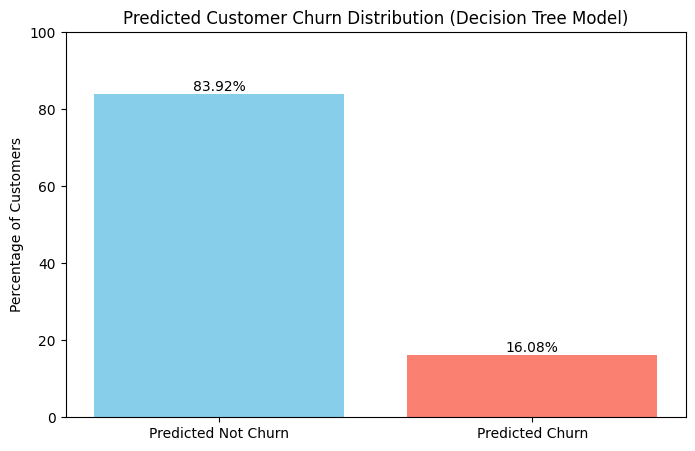

Out of 10127 customers, based on Decision Tree model:
- 1628 (16.08%) are predicted to churn (>= 70% probability)
- 8499 (83.92%) are predicted to stay


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# --- Re-apply full preprocessing to ensure df is clean ---
# The 'Credit-Card.csv' file MUST be present at '/content/Credit-Card.csv'
# If this file is not present, a FileNotFoundError will occur.
df = pd.read_csv('/content/Credit-Card.csv')

# Drop irrelevant ID column (if it exists)
if 'CLIENTNUM' in df.columns:
    df.drop(['CLIENTNUM'], axis=1, inplace=True)

# Encode target variable (Attrition_Flag) to numerical if not already done
# Check if Attrition_Flag is still in string format
if df['Attrition_Flag'].dtype == 'object':
    df['Attrition_Flag'] = df['Attrition_Flag'].map({
        'Existing Customer': 0,
        'Attrited Customer': 1
    })

categorical_cols = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'
]

# Apply one-hot encoding to categorical columns (handle cases where they might have been encoded already)
# Only apply if these columns still exist and are of object type
current_categorical_cols = [col for col in categorical_cols if col in df.columns and df[col].dtype == 'object']
if current_categorical_cols:
    df = pd.get_dummies(df, columns=current_categorical_cols, drop_first=True)

# Drop data leakage columns if they still exist
columns_to_drop = [
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]
current_leakage_cols = [col for col in columns_to_drop if col in df.columns]
if current_leakage_cols:
    df.drop(columns=current_leakage_cols, inplace=True)

# --- End of preprocessing ---

X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Re-scale data after re-splitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scale the entire feature set for full dataset prediction
X_all_scaled = scaler.transform(X)

# Re-train Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

print("Data fully re-processed, re-split, and re-scaled.")
print("Decision Tree Model re-trained successfully.")

# Predict churn probability with Decision Tree model for all customers
churn_prob_dt_all = dt_model.predict_proba(X_all_scaled)[:, 1] * 100

threshold = 70  # 70% churn probability

high_risk_dt = (churn_prob_dt_all >= threshold).sum()
low_risk_dt = len(churn_prob_dt_all) - high_risk_dt

total_customers = len(X)
high_risk_dt_percent = (high_risk_dt / total_customers) * 100
low_risk_dt_percent = (low_risk_dt / total_customers) * 100

plt.figure(figsize=(8, 5))
plt.bar(
    ['Predicted Not Churn', 'Predicted Churn'],
    [low_risk_dt_percent, high_risk_dt_percent],
    color=['skyblue', 'salmon']
)

plt.title('Predicted Customer Churn Distribution (Decision Tree Model)')
plt.ylabel('Percentage of Customers')
plt.ylim(0, 100) # Ensure y-axis goes up to 100%

plt.text(0, low_risk_dt_percent, f"{low_risk_dt_percent:.2f}%", ha='center', va='bottom', fontsize=10)
plt.text(1, high_risk_dt_percent, f"{high_risk_dt_percent:.2f}%", ha='center', va='bottom', fontsize=10)

plt.show()

print(f"Out of {total_customers} customers, based on Decision Tree model:")
print(f"- {high_risk_dt} ({high_risk_dt_percent:.2f}%) are predicted to churn (>= {threshold}% probability)")
print(f"- {low_risk_dt} ({low_risk_dt_percent:.2f}%) are predicted to stay")


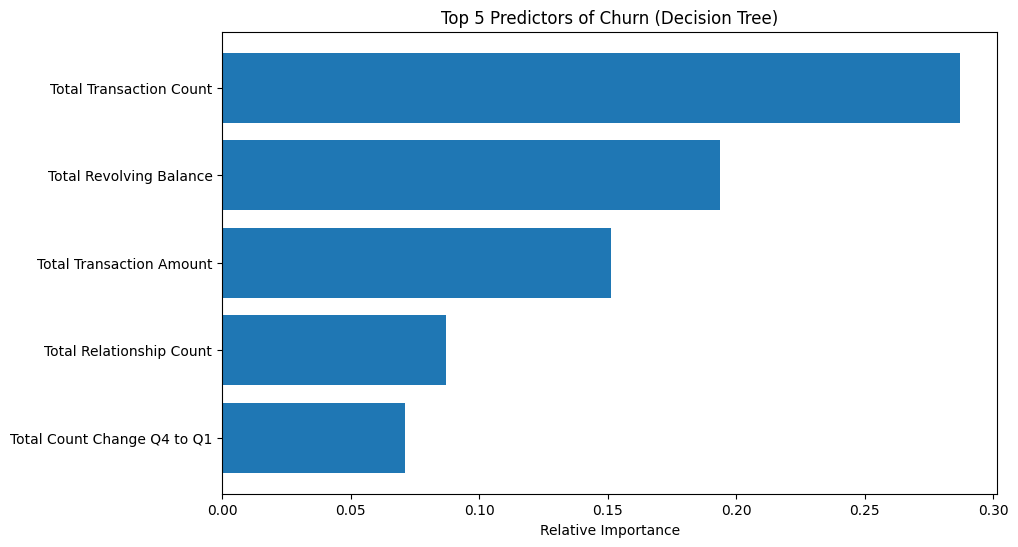

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# 1. Load the Credit-Card.csv dataset into a pandas DataFrame named df.
df = pd.read_csv('/content/Credit-Card.csv')

# 2. Drop the CLIENTNUM column from df.
if 'CLIENTNUM' in df.columns:
    df.drop(['CLIENTNUM'], axis=1, inplace=True)

# 3. Map the Attrition_Flag column to numerical values.
if df['Attrition_Flag'].dtype == 'object':
    df['Attrition_Flag'] = df['Attrition_Flag'].map({
        'Existing Customer': 0,
        'Attrited Customer': 1
    })

# 4. Define a list of categorical column names.
categorical_cols = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'
]

# 5. Apply one-hot encoding to these categorical columns.
current_categorical_cols = [col for col in categorical_cols if col in df.columns and df[col].dtype == 'object']
if current_categorical_cols:
    df = pd.get_dummies(df, columns=current_categorical_cols, drop_first=True)

# 6. Drop the two data leakage columns.
columns_to_drop = [
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]
current_leakage_cols = [col for col in columns_to_drop if col in df.columns]
if current_leakage_cols:
    df.drop(columns=current_leakage_cols, inplace=True)

# 7. Separate the features (X) and the target variable (y).
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

# 8. Split X and y into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 9. Initialize a StandardScaler and transform the data.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 10. Initialize and train a DecisionTreeClassifier.
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# 11. Extract the feature importances from the trained Decision Tree model.
importances = dt_model.feature_importances_

# 12. Get the names of the features from X.columns.
feature_names = X.columns

# 13. Identify the top 5 features based on their importance scores.
indices = np.argsort(importances)[-5:] # Top 5 features

# Map abbreviated feature names to full words for better readability
feature_labels_map = {
    'Total_Trans_Ct': 'Total Transaction Count',
    'Total_Trans_Amt': 'Total Transaction Amount',
    'Credit_Limit': 'Credit Limit',
    'Total_Relationship_Count': 'Total Relationship Count',
    'Avg_Utilization_Ratio': 'Average Utilization Ratio',
    'Total_Ct_Chng_Q4_Q1': 'Total Count Change Q4 to Q1',
    'Total_Revolving_Bal': 'Total Revolving Balance'
}

ytick_labels = [feature_labels_map.get(feature_names[i], feature_names[i].replace('_', ' ')) for i in indices]

# 14. Create a horizontal bar chart to visualize these top 5 feature importances.
plt.figure(figsize=(10, 6))
plt.title('Top 5 Predictors of Churn (Decision Tree)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), ytick_labels) # Use mapped labels
plt.xlabel('Relative Importance')
plt.show()

/tmp/ipython-input-3708284135.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3708284135.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3708284135.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3708284135.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3708284135.py:34: FutureWarning: 

Passin

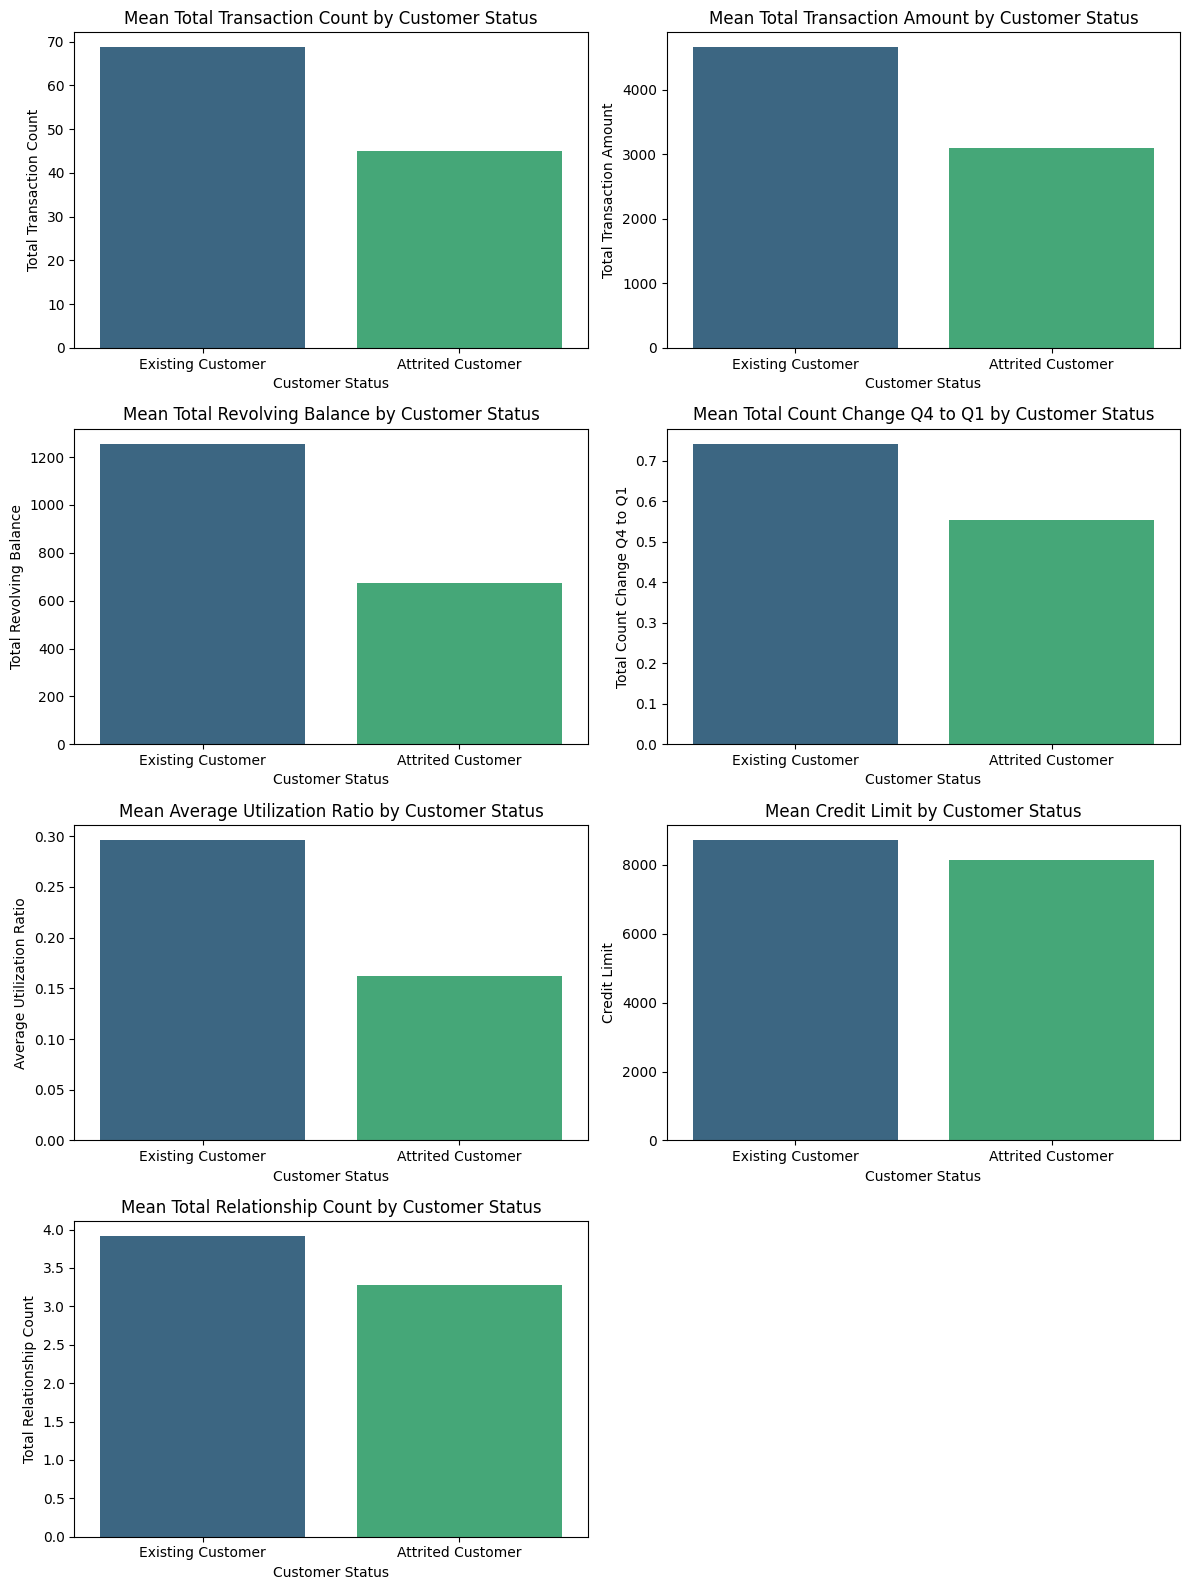

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' DataFrame is available from previous cells and preprocessed
# The 'Attrition_Flag' column should be numerical (0 and 1)

# List of transaction-related predictors to visualize
transaction_predictors = [
    'Total_Trans_Ct',
    'Total_Trans_Amt',
    'Total_Revolving_Bal',
    'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio',
    'Credit_Limit',
    'Total_Relationship_Count'
]

# Map numerical Attrition_Flag back to descriptive labels for plotting
df_plot = df.copy()
df_plot['Attrition_Flag_Label'] = df_plot['Attrition_Flag'].map({
    0: 'Existing Customer',
    1: 'Attrited Customer'
})

# Define the number of rows and columns for subplots
n_plots = len(transaction_predictors)
n_cols = 2
n_rows = (n_plots + n_cols - 1) // n_cols # Calculate rows needed

plt.figure(figsize=(12, 4 * n_rows)) # Adjust figure size dynamically

for i, feature in enumerate(transaction_predictors):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.barplot(
        x='Attrition_Flag_Label',
        y=feature,
        data=df_plot,
        errorbar=None, # Remove error bars for cleaner look
        palette='viridis'
    )
    # Use descriptive labels for title and y-axis
    title_label = feature.replace('_', ' ')
    # Optionally, provide specific full names for more clarity
    if feature == 'Total_Trans_Ct':
        title_label = 'Total Transaction Count'
    elif feature == 'Total_Trans_Amt':
        title_label = 'Total Transaction Amount'
    elif feature == 'Total_Revolving_Bal':
        title_label = 'Total Revolving Balance'
    elif feature == 'Total_Ct_Chng_Q4_Q1':
        title_label = 'Total Count Change Q4 to Q1'
    elif feature == 'Avg_Utilization_Ratio':
        title_label = 'Average Utilization Ratio'
    elif feature == 'Credit_Limit':
        title_label = 'Credit Limit'
    elif feature == 'Total_Relationship_Count':
        title_label = 'Total Relationship Count'

    plt.title(f'Mean {title_label} by Customer Status')
    plt.xlabel('Customer Status')
    plt.ylabel(title_label)
    plt.xticks(rotation=0) # Keep labels horizontal

plt.tight_layout()
plt.show()

/tmp/ipython-input-102612574.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


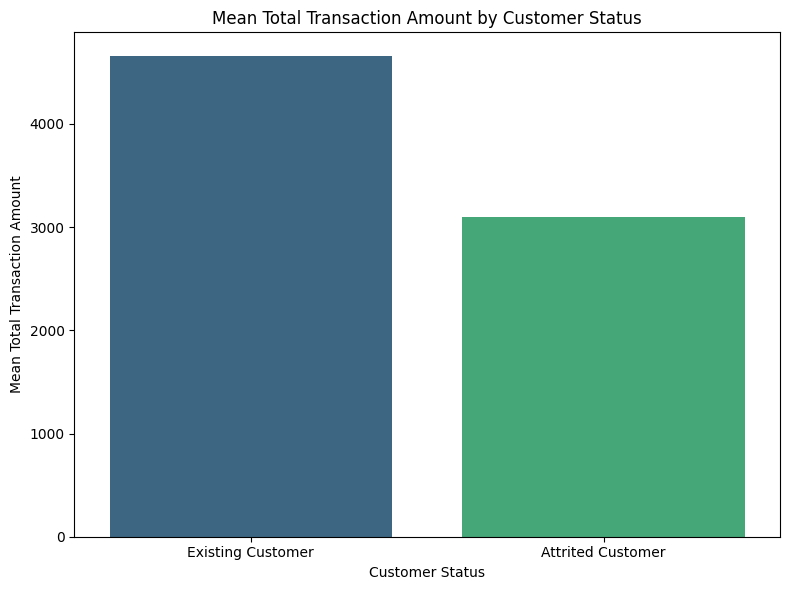

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' DataFrame is available from previous cells and preprocessed
# The 'Attrition_Flag' column should be numerical (0 and 1)

# Map numerical Attrition_Flag back to descriptive labels for plotting
df_plot = df.copy()
df_plot['Attrition_Flag_Label'] = df_plot['Attrition_Flag'].map({
    0: 'Existing Customer',
    1: 'Attrited Customer'
})

plt.figure(figsize=(8, 6))
sns.barplot(
    x='Attrition_Flag_Label',
    y='Total_Trans_Amt',
    data=df_plot,
    errorbar=None,
    palette='viridis',
    hue='Attrition_Flag_Label', # Added for future compatibility
    legend=False # Added to suppress redundant legend
)
plt.title('Mean Total Transaction Amount by Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Mean Total Transaction Amount')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

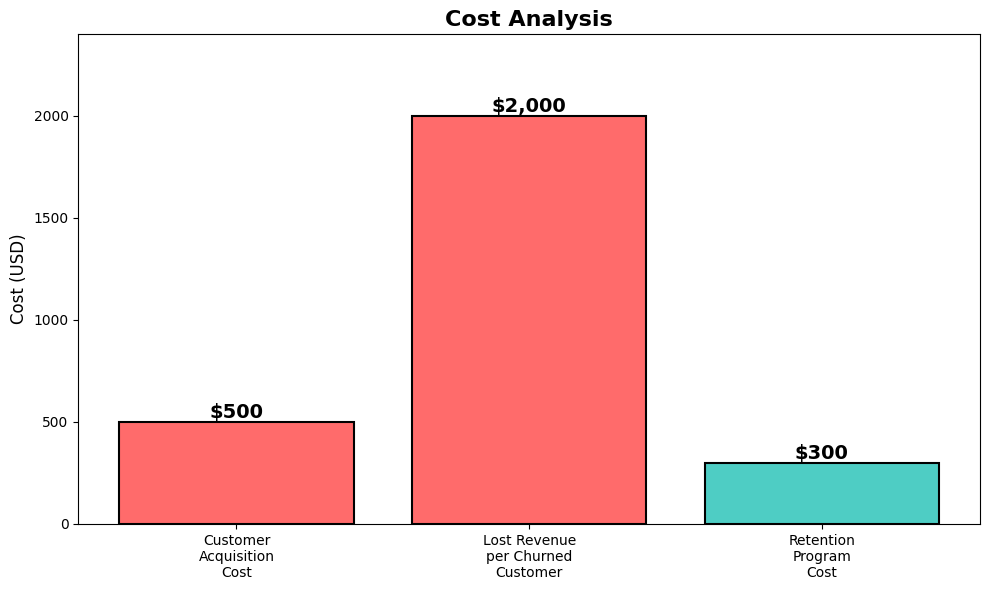

In [67]:
# Cost comparison visualization
import matplotlib.pyplot as plt
import numpy as np

costs = ['Customer\nAcquisition\nCost', 'Lost Revenue\nper Churned\nCustomer', 'Retention\nProgram\nCost']
values = [500, 2000, 300]  # Example values in dollars
colors = ['#ff6b6b', '#ff6b6b', '#4ecdc4']

plt.figure(figsize=(10, 6))
bars = plt.bar(costs, values, color=colors, edgecolor='black', linewidth=1.5)
plt.title('Cost Analysis', fontsize=16, fontweight='bold')
plt.ylabel('Cost (USD)', fontsize=12)
plt.ylim(0, max(values) * 1.2)

# Add value labels on bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${value:,.0f}', # Fixed: Removed space in format specifier
             ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


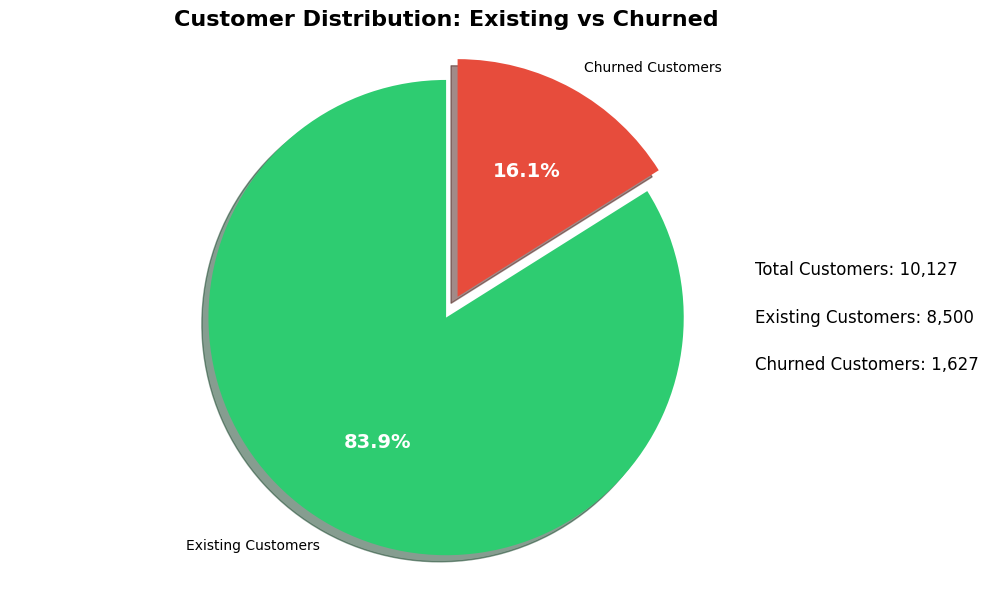

Existing Customers:  8,500
Churned Customers: 1,627
Churn Rate: 16.1%


In [71]:
# Class imbalance visualization
churn_counts = df['Attrition_Flag'].value_counts()
total_customers = churn_counts.sum()

plt.figure(figsize=(10, 6)) # Increased figure size to make space for text
colors = ['#2ecc71', '#e74c3c']
wedges, texts, autotexts = plt.pie(
    churn_counts.values,
    labels=['Existing Customers', 'Churned Customers'],
    autopct='%1.1f%%',
    colors=colors,
    explode=(0, 0.1),
    shadow=True,
    startangle=90
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')

plt.title('Customer Distribution: Existing vs Churned', fontsize=16, fontweight='bold')
plt.axis('equal')

# Add total customers text on the side
plt.text(1.3, 0.2, f'Total Customers: {total_customers:,}', fontsize=12, ha='left', va='center')
plt.text(1.3, 0, f'Existing Customers: {churn_counts[0]:,}', fontsize=12, ha='left', va='center')
plt.text(1.3, -0.2, f'Churned Customers: {churn_counts[1]:,}', fontsize=12, ha='left', va='center')

plt.tight_layout()
plt.show()

# Add count labels
print(f"Existing Customers: {churn_counts[0]: ,}")
print(f"Churned Customers: {churn_counts[1]:,}")
print(f"Churn Rate: {churn_counts[1]/(churn_counts[0]+churn_counts[1])*100:.1f}%")

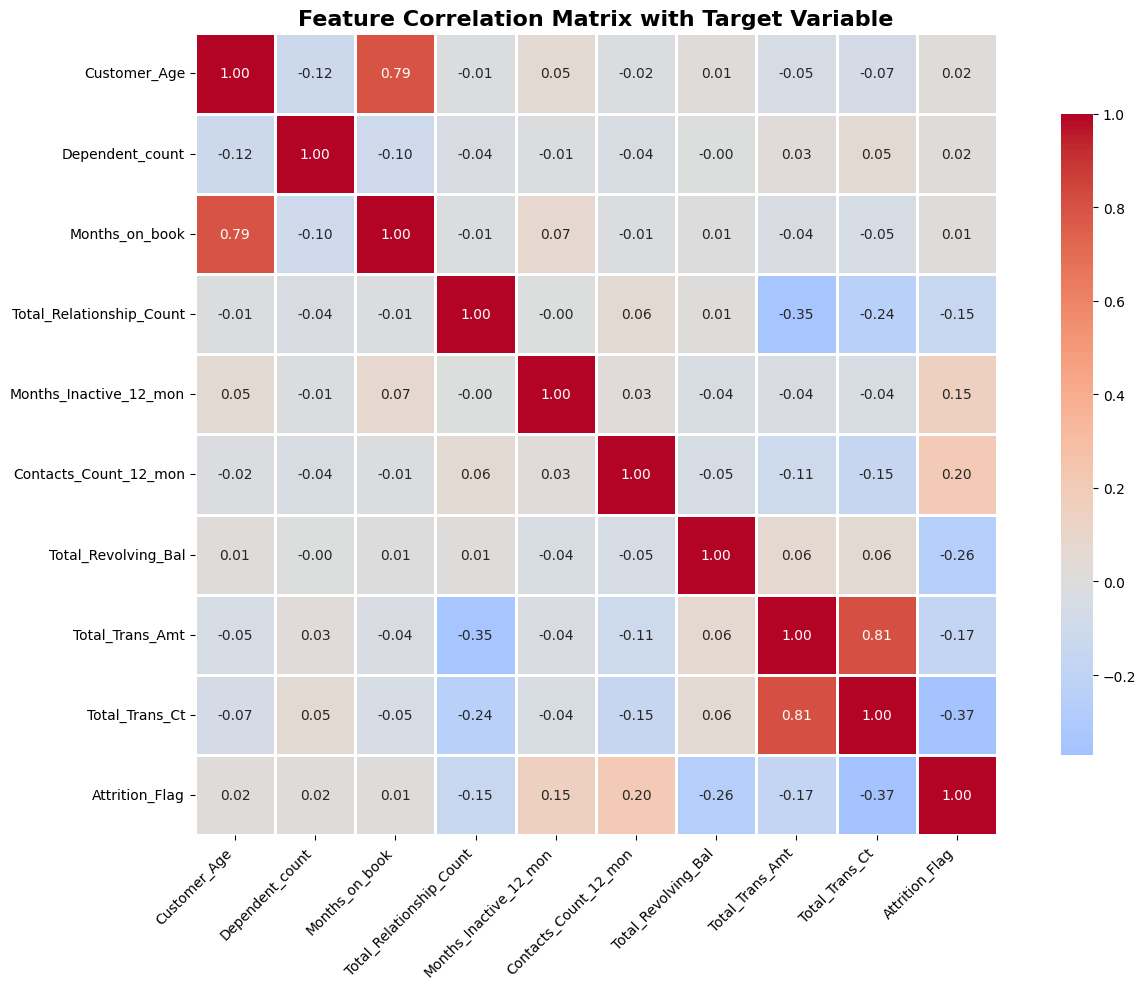

In [72]:
# Correlation heatmap
plt.figure(figsize=(14, 10))

# Select top numerical features
numerical_features = ['Customer_Age', 'Dependent_count', 'Months_on_book',
                     'Total_Relationship_Count', 'Months_Inactive_12_mon',
                     'Contacts_Count_12_mon', 'Total_Revolving_Bal',
                     'Total_Trans_Amt', 'Total_Trans_Ct', 'Attrition_Flag']

correlation_matrix = df[numerical_features].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix with Target Variable', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

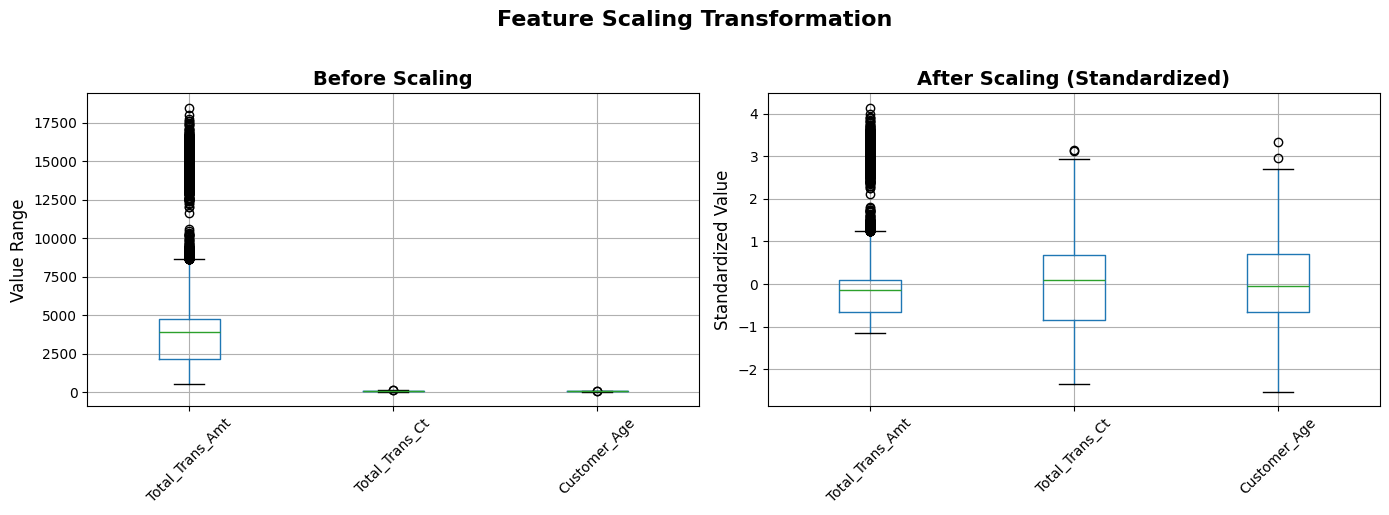

In [73]:
# Before and after scaling visualization
from sklearn.preprocessing import StandardScaler

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before scaling
df[['Total_Trans_Amt', 'Total_Trans_Ct', 'Customer_Age']].boxplot(ax=axes[0])
axes[0].set_title('Before Scaling', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Value Range', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# After scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Total_Trans_Amt', 'Total_Trans_Ct', 'Customer_Age']])
scaled_df = pd.DataFrame(scaled_data, columns=['Total_Trans_Amt', 'Total_Trans_Ct', 'Customer_Age'])
scaled_df.boxplot(ax=axes[1])
axes[1].set_title('After Scaling (Standardized)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Standardized Value', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle('Feature Scaling Transformation', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

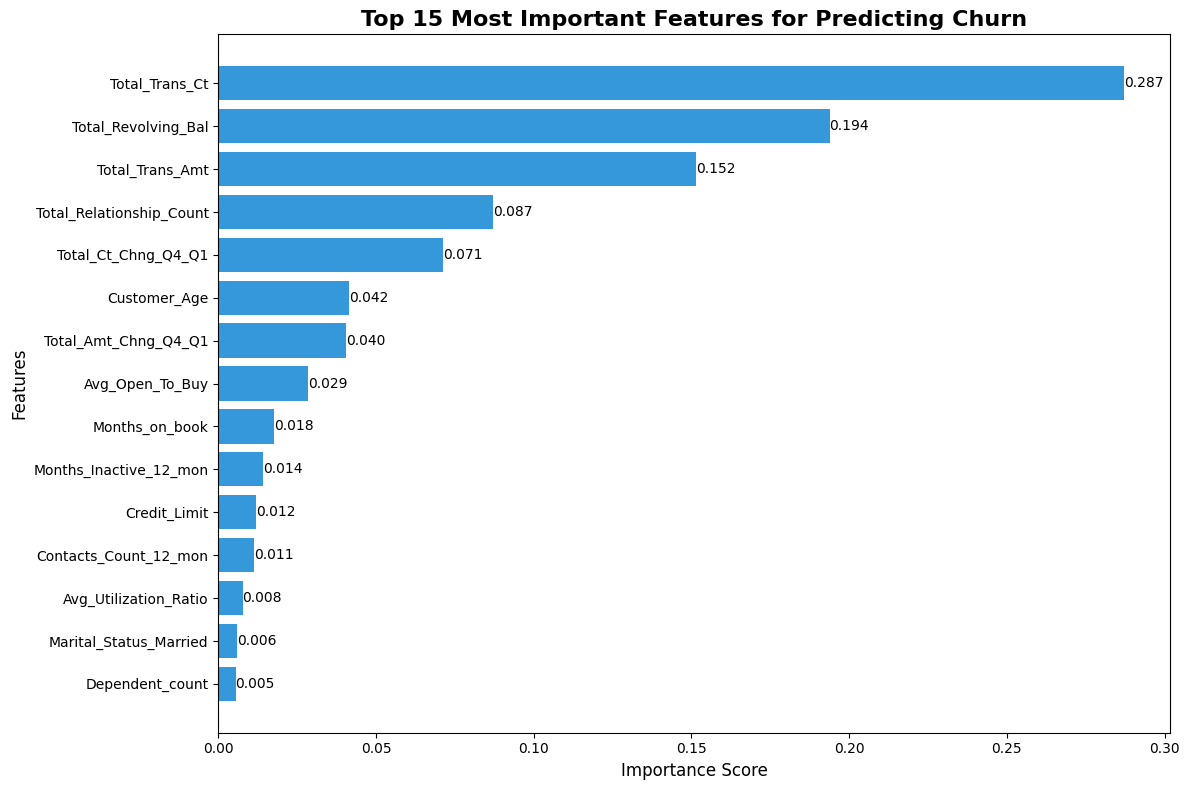

In [74]:
# For Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Assuming you've trained the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train. columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False).head(15)

plt.figure(figsize=(12, 8))
bars = plt.barh(feature_importance['feature'], feature_importance['importance'], color='#3498db')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 15 Most Important Features for Predicting Churn', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

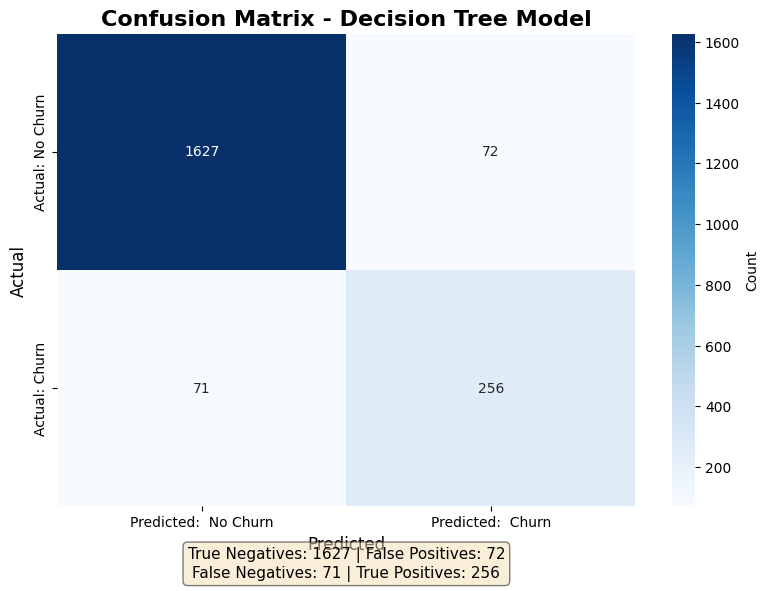

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# For Decision Tree (best model)
y_pred_dt = dt_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'},
            xticklabels=['Predicted:  No Churn', 'Predicted:  Churn'],
            yticklabels=['Actual: No Churn', 'Actual: Churn'])

plt.title('Confusion Matrix - Decision Tree Model', fontsize=16, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)

# Add explanatory text
plt.text(0.5, -0.15,
         f'True Negatives: {cm[0,0]} | False Positives: {cm[0,1]}\nFalse Negatives: {cm[1,0]} | True Positives: {cm[1,1]}',
         transform=plt.gca().transAxes, ha='center', fontsize=11, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

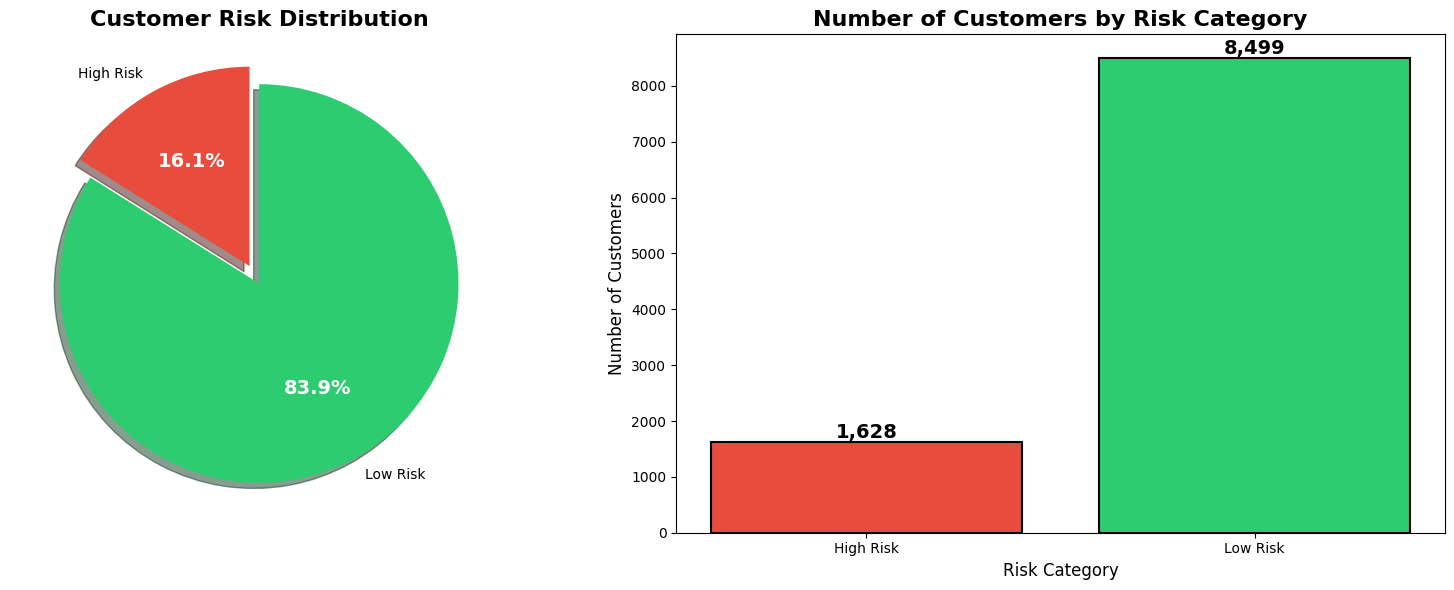


📊 Risk Segmentation Summary:
  High Risk: 1,628 customers (16.1%)
  Low Risk: 8,499 customers (83.9%)


In [77]:
# Customer risk segmentation
def categorize_risk(prob):
    if prob >= 70:
        return 'High Risk'
    elif prob >= 40:
        return 'Medium Risk'
    else:
        return 'Low Risk'

churn_probs = dt_model.predict_proba(X_all_scaled)[:, 1] * 100
risk_categories = [categorize_risk(p) for p in churn_probs]
risk_counts = pd.Series(risk_categories).value_counts().sort_index() # Sort to ensure consistent order

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Define a consistent color map for risk categories
risk_color_map = {
    'Low Risk': '#2ecc71',
    'Medium Risk': '#f39c12',
    'High Risk': '#e74c3c'
}

# Get colors and explode values only for categories present in risk_counts
actual_colors = [risk_color_map[cat] for cat in risk_counts.index]
# Explode 'High Risk' slightly more if present
actual_explode = [0.1 if cat == 'High Risk' else 0 for cat in risk_counts.index]

# Pie chart
wedges, texts, autotexts = ax1.pie(
    risk_counts.values,
    labels=risk_counts.index,
    autopct='%1.1f%%',
    colors=actual_colors, # Use dynamic colors
    explode=actual_explode, # Use dynamic explode
    shadow=True,
    startangle=90
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')

ax1.set_title('Customer Risk Distribution', fontsize=16, fontweight='bold')

# Bar chart with counts
bars = ax2.bar(risk_counts.index, risk_counts.values, color=actual_colors, edgecolor='black', linewidth=1.5)
ax2.set_title('Number of Customers by Risk Category', fontsize=16, fontweight='bold')
ax2.set_ylabel('Number of Customers', fontsize=12)
ax2.set_xlabel('Risk Category', fontsize=12)

# Add count labels
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary
print("\n📊 Risk Segmentation Summary:")
for category, count in risk_counts.items():
    percentage = (count / len(churn_probs)) * 100
    print(f"  {category}: {count:,} customers ({percentage:.1f}%)")

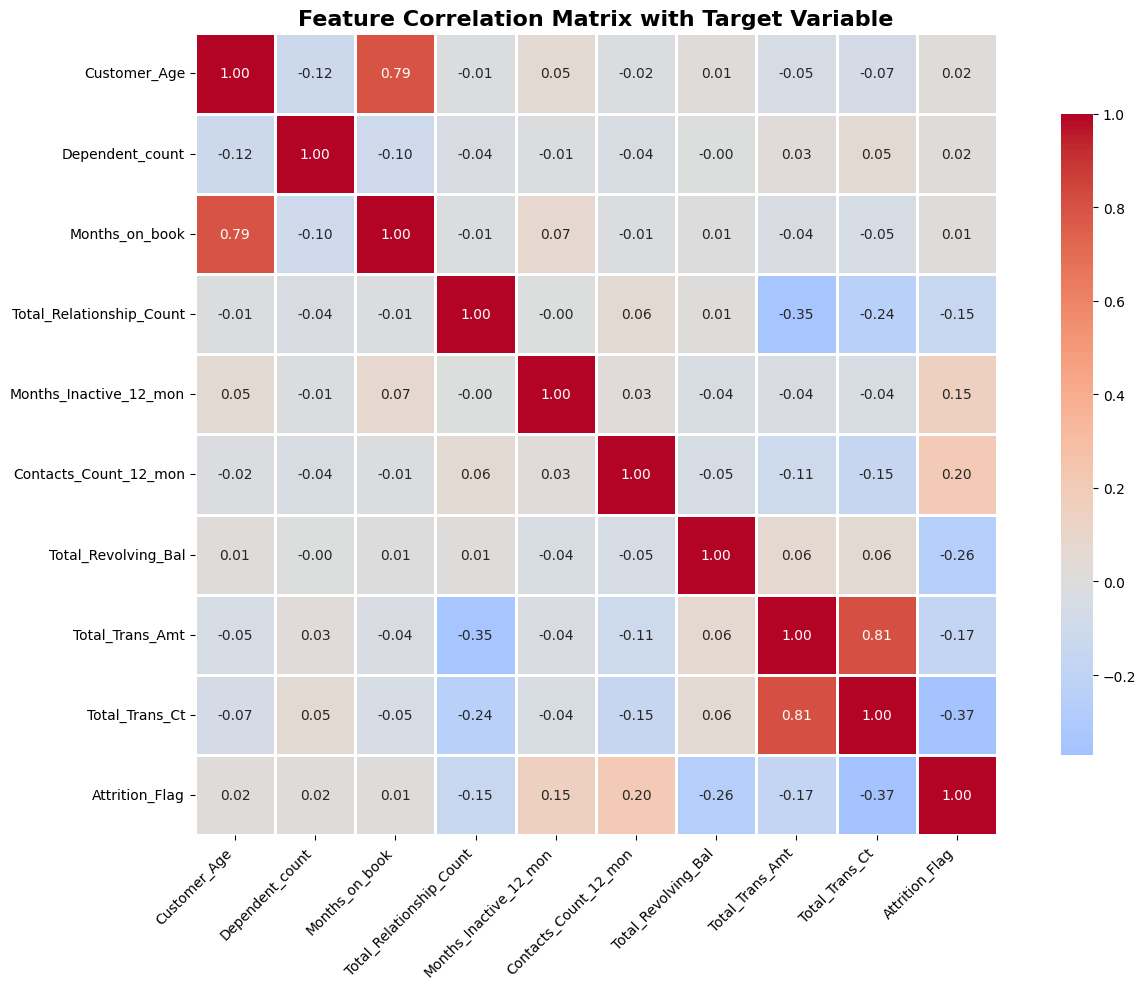

In [78]:
# Correlation heatmap
plt.figure(figsize=(14, 10))

# Select top numerical features
numerical_features = ['Customer_Age', 'Dependent_count', 'Months_on_book',
                     'Total_Relationship_Count', 'Months_Inactive_12_mon',
                     'Contacts_Count_12_mon', 'Total_Revolving_Bal',
                     'Total_Trans_Amt', 'Total_Trans_Ct', 'Attrition_Flag']

correlation_matrix = df[numerical_features].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix with Target Variable', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

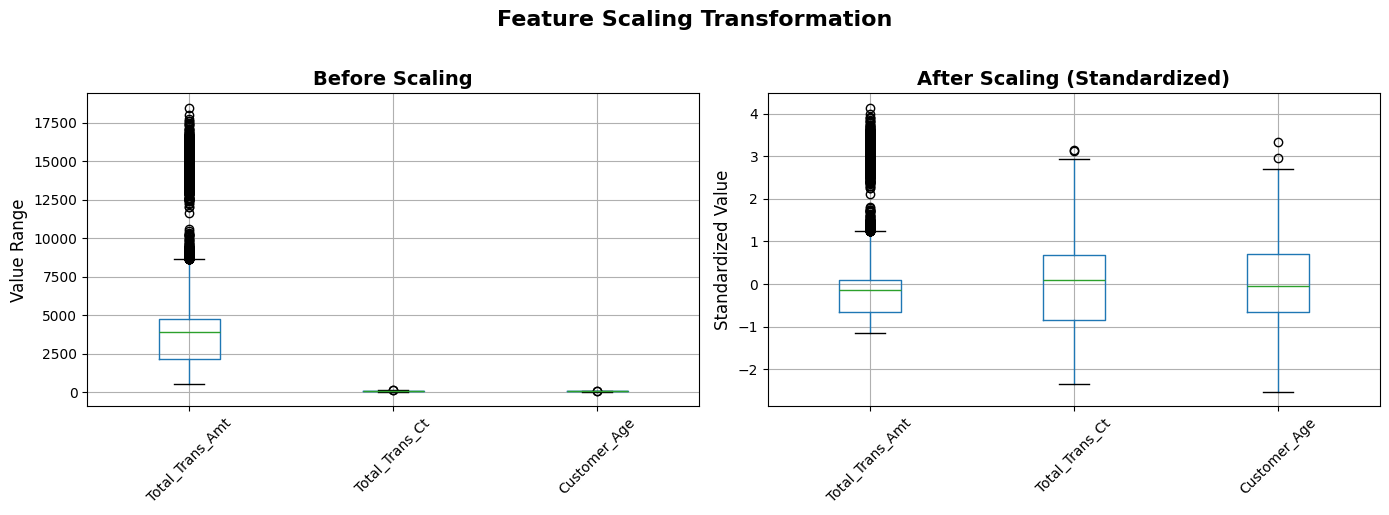

In [79]:
# Before and after scaling visualization
from sklearn.preprocessing import StandardScaler

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before scaling
df[['Total_Trans_Amt', 'Total_Trans_Ct', 'Customer_Age']].boxplot(ax=axes[0])
axes[0].set_title('Before Scaling', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Value Range', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# After scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Total_Trans_Amt', 'Total_Trans_Ct', 'Customer_Age']])
scaled_df = pd.DataFrame(scaled_data, columns=['Total_Trans_Amt', 'Total_Trans_Ct', 'Customer_Age'])
scaled_df.boxplot(ax=axes[1])
axes[1].set_title('After Scaling (Standardized)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Standardized Value', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle('Feature Scaling Transformation', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

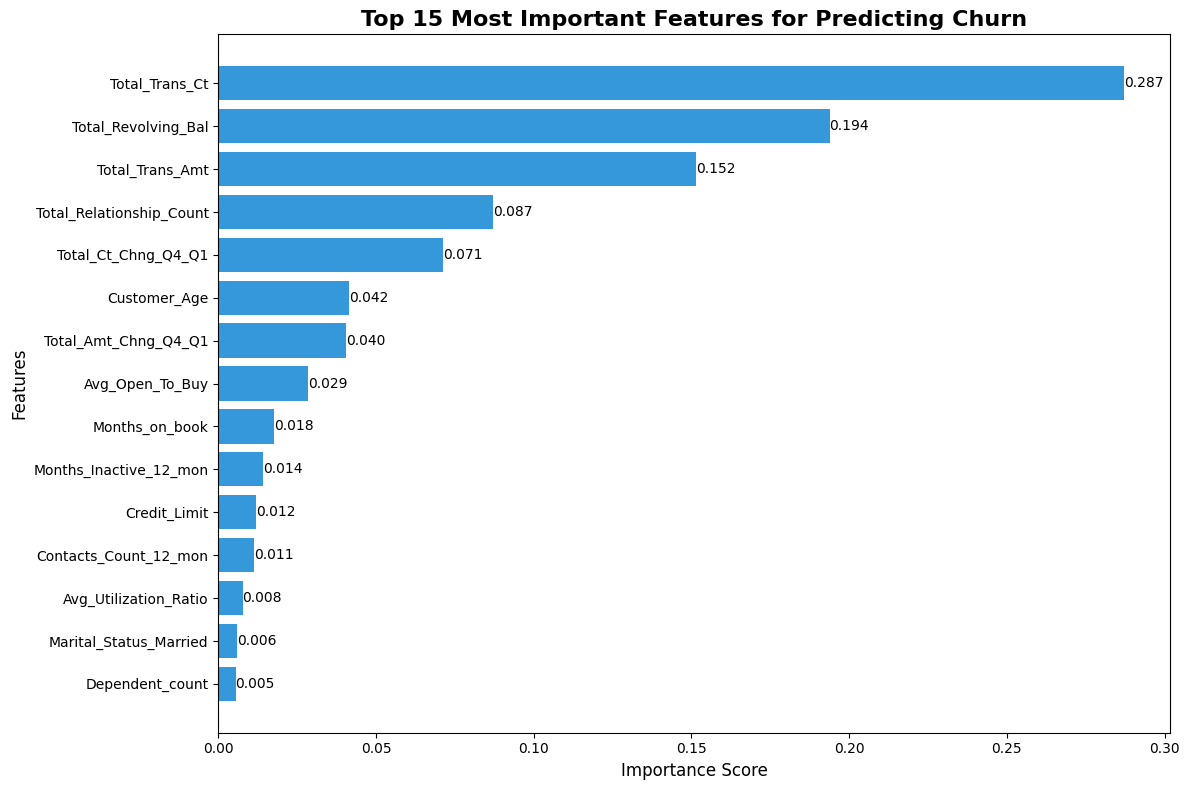

In [80]:
# For Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Assuming you've trained the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train. columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False).head(15)

plt.figure(figsize=(12, 8))
bars = plt.barh(feature_importance['feature'], feature_importance['importance'], color='#3498db')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 15 Most Important Features for Predicting Churn', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

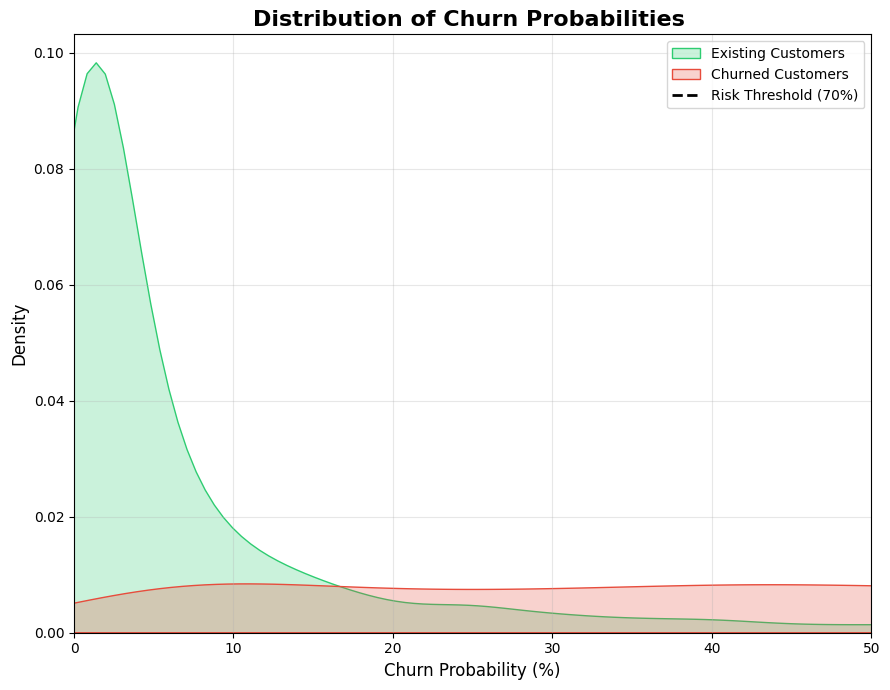

In [84]:
# Churn probability distribution

# Get predictions for all data
churn_probs = log_model.predict_proba(X_all_scaled)[:, 1] * 100

plt.figure(figsize=(9, 7)) # Create a single figure for the zoomed plot

sns.kdeplot(
    x=churn_probs[y == 0], label='Existing Customers', color='#2ecc71', fill=True
)
sns.kdeplot(
    x=churn_probs[y == 1], label='Churned Customers', color='#e74c3c', fill=True
)
plt.axvline(x=70, color='black', linestyle='--', linewidth=2, label='Risk Threshold (70%)')
plt.xlabel('Churn Probability (%)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of Churn Probabilities ', fontsize=16, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.xlim(0, 50)

plt.tight_layout()
plt.show()

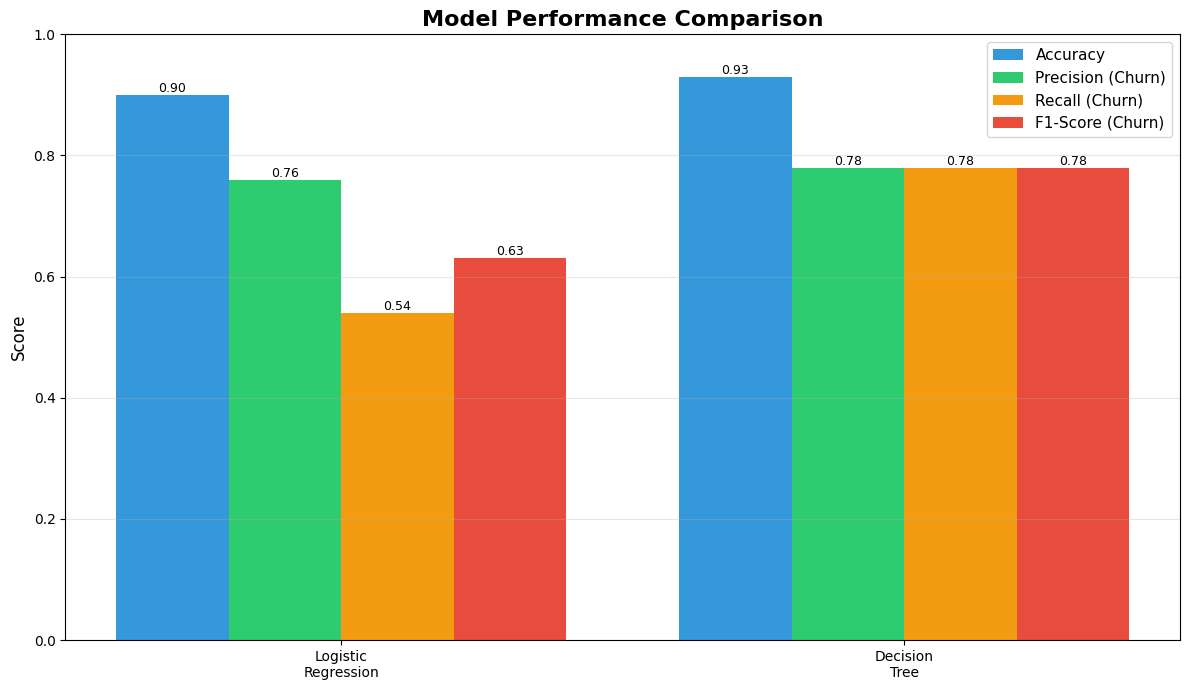

In [87]:
# Model performance comparison
models = ['Logistic\nRegression', 'Decision\nTree']
accuracy = [0.90, 0.93]
precision_churn = [0.76, 0.78]
recall_churn = [0.54, 0.78]
f1_churn = [0.63, 0.78]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 7))

bars1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='#3498db')
bars2 = ax.bar(x - 0.5*width, precision_churn, width, label='Precision (Churn)', color='#2ecc71')
bars3 = ax.bar(x + 0.5*width, recall_churn, width, label='Recall (Churn)', color='#f39c12')
bars4 = ax.bar(x + 1.5*width, f1_churn, width, label='F1-Score (Churn)', color='#e74c3c')

ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Performance Comparison', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(fontsize=11)
ax.set_ylim(0, 1.0)
ax.grid(axis='y', alpha=0.3)

# Add value labels
def add_labels(bars):
    for bar in bars:
        height = bar. get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=9)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)

plt.tight_layout()
plt.show()

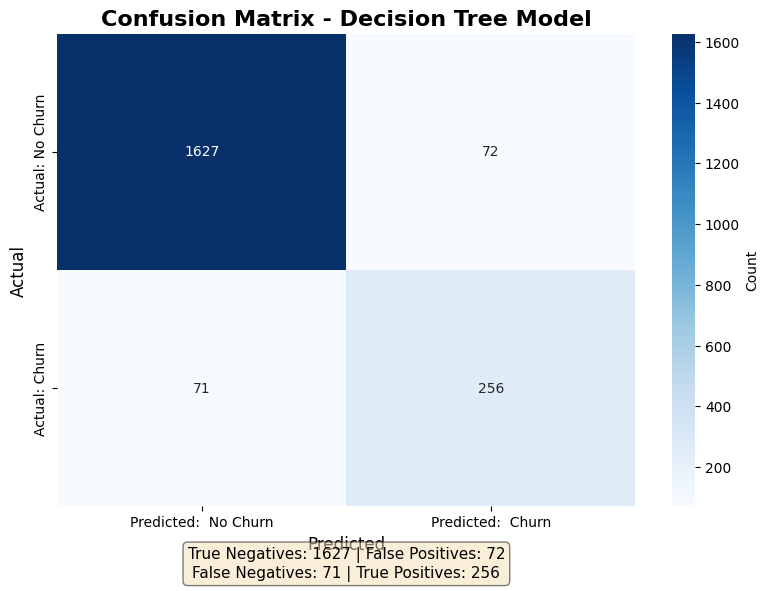

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# For Decision Tree (best model)
y_pred_dt = dt_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'},
            xticklabels=['Predicted:  No Churn', 'Predicted:  Churn'],
            yticklabels=['Actual: No Churn', 'Actual: Churn'])

plt.title('Confusion Matrix - Decision Tree Model', fontsize=16, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)

# Add explanatory text
plt.text(0.5, -0.15,
         f'True Negatives: {cm[0,0]} | False Positives: {cm[0,1]}\nFalse Negatives: {cm[1,0]} | True Positives: {cm[1,1]}',
         transform=plt.gca().transAxes, ha='center', fontsize=11, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

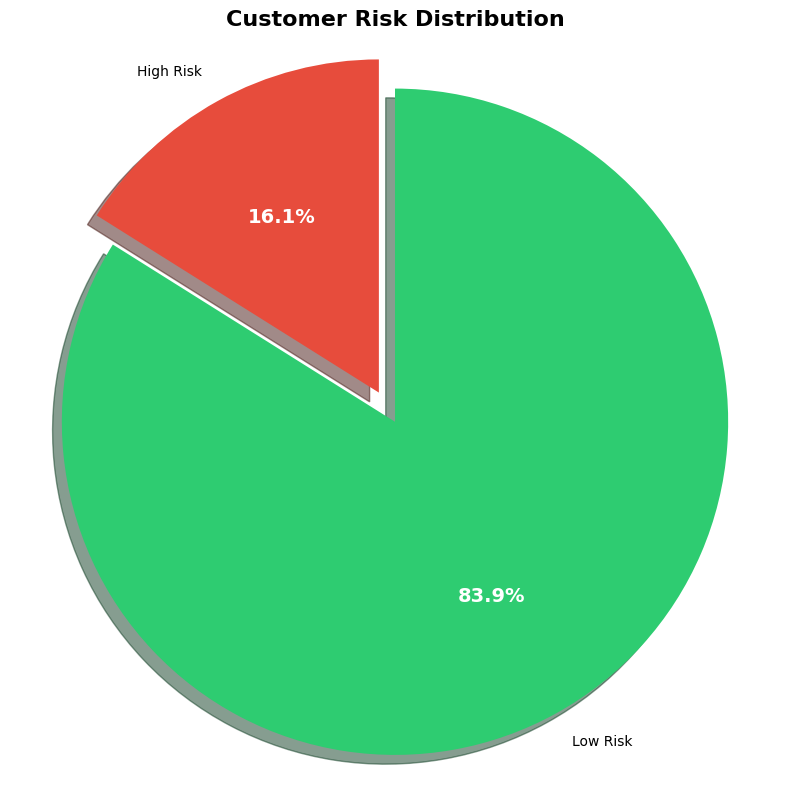

/tmp/ipython-input-614686801.py:72: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


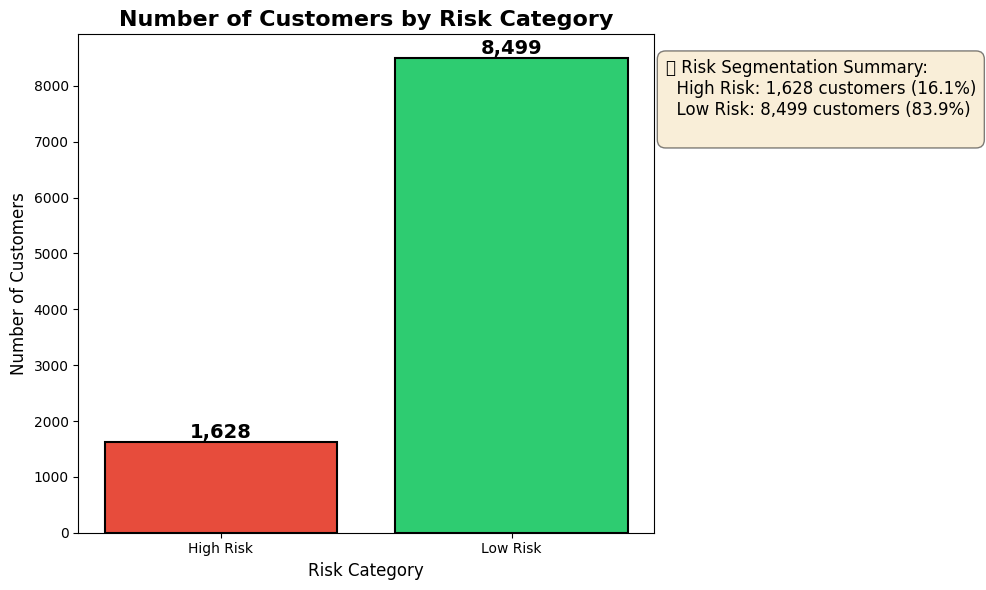

In [91]:
# Customer risk segmentation
def categorize_risk(prob):
    if prob >= 70:
        return 'High Risk'
    elif prob >= 40:
        return 'Medium Risk'
    else:
        return 'Low Risk'

churn_probs = dt_model.predict_proba(X_all_scaled)[:, 1] * 100
risk_categories = [categorize_risk(p) for p in churn_probs]
risk_counts = pd.Series(risk_categories).value_counts().sort_index() # Sort to ensure consistent order

# Define a consistent color map for risk categories
risk_color_map = {
    'Low Risk': '#2ecc71',
    'Medium Risk': '#f39c12',
    'High Risk': '#e74c3c'
}

# Get colors and explode values only for categories present in risk_counts
actual_colors = [risk_color_map[cat] for cat in risk_counts.index]
# Explode 'High Risk' slightly more if present
actual_explode = [0.1 if cat == 'High Risk' else 0 for cat in risk_counts.index]

# --- First Chart: Pie Chart ---
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    risk_counts.values,
    labels=risk_counts.index,
    autopct='%1.1f%%',
    colors=actual_colors,
    explode=actual_explode,
    shadow=True,
    startangle=90
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')

plt.title('Customer Risk Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

# --- Second Chart: Bar Chart with Summary Text ---
plt.figure(figsize=(10, 6))
ax = plt.gca() # Get current axes to add text
bars = ax.bar(risk_counts.index, risk_counts.values, color=actual_colors, edgecolor='black', linewidth=1.5)
ax.set_title('Number of Customers by Risk Category', fontsize=16, fontweight='bold')
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_xlabel('Risk Category', fontsize=12)

# Add count labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=14, fontweight='bold')

# Add summary text to the chart itself
summary_text = "📊 Risk Segmentation Summary:\n"
for category, count in risk_counts.items():
    percentage = (count / len(churn_probs)) * 100
    summary_text += f"  {category}: {count:,} customers ({percentage:.1f}%)\n"

ax.text(1.02, 0.95, summary_text, transform=ax.transAxes, fontsize=12, va='top', ha='left',
        bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

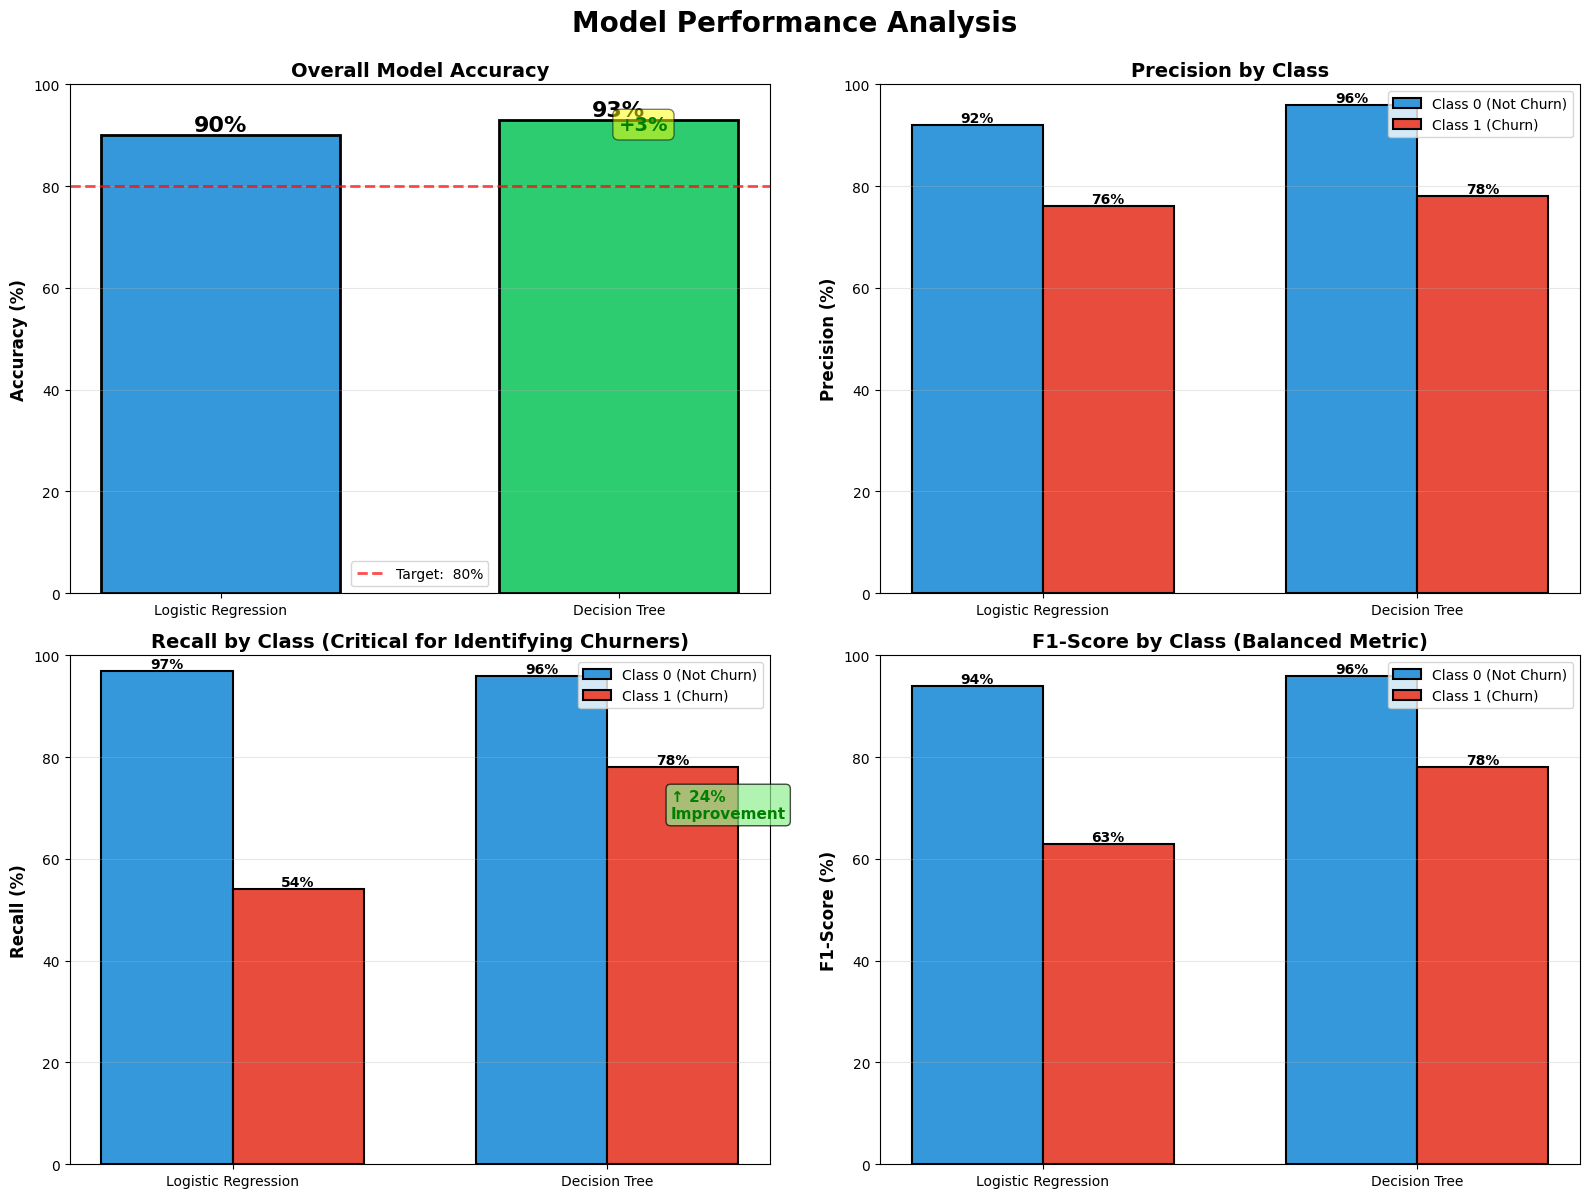

📊 MODEL ACCURACY SUMMARY

Metric                         Logistic Regression  Decision Tree        Improvement    
-------------------------------------------------------------------------------------
Overall Accuracy               90%                  93%                  +3%
Precision (Churn Detection)    76%                  78%                  +2%
Recall (Churn Detection)       54%                  78%                  +24%
F1-Score (Churn Detection)     63%                  78%                  +15%

✅ WINNER: Decision Tree with 93% accuracy
✅ KEY IMPROVEMENT: 24% better at identifying churning customers


In [102]:
import matplotlib.pyplot as plt
import numpy as np

# Model accuracy metrics (from your previous results)
models = ['Logistic Regression', 'Decision Tree']
accuracy = [90, 93]
precision_class0 = [92, 96]  # Existing customers
precision_class1 = [76, 78]  # Churned customers
recall_class0 = [97, 96]
recall_class1 = [54, 78]
f1_class0 = [94, 96]
f1_class1 = [63, 78]

# Create comprehensive accuracy visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Analysis', fontsize=20, fontweight='bold', y=0.995)

# Chart 1: Overall Accuracy Comparison
ax1 = axes[0, 0]
bars1 = ax1.bar(models, accuracy, color=['#3498db', '#2ecc71'], edgecolor='black', linewidth=2, width=0.6)
ax1.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax1.set_title('Overall Model Accuracy', fontsize=14, fontweight='bold')
ax1.set_ylim(0, 100)
ax1.axhline(y=80, color='red', linestyle='--', linewidth=2, label='Target:  80%', alpha=0.7)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for bar, acc in zip(bars1, accuracy):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{acc}%',
             ha='center', va='bottom', fontsize=16, fontweight='bold')

# Add improvement annotation
improvement = accuracy[1] - accuracy[0]
ax1.annotate(f'+{improvement}%',
           xy=(1, accuracy[1] - 2),
           fontsize=14, color='green', fontweight='bold',
           bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

# Chart 2: Precision Comparison
ax2 = axes[0, 1]
x = np.arange(len(models))
width = 0.35

bars2_1 = ax2.bar(x - width/2, precision_class0, width, label='Class 0 (Not Churn)',
                  color='#3498db', edgecolor='black', linewidth=1.5)
bars2_2 = ax2.bar(x + width/2, precision_class1, width, label='Class 1 (Churn)',
                  color='#e74c3c', edgecolor='black', linewidth=1.5)

ax2.set_ylabel('Precision (%)', fontsize=12, fontweight='bold')
ax2.set_title('Precision by Class', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(models)
ax2.legend()
ax2.set_ylim(0, 100)
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars2_1, bars2_2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}%',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Chart 3: Recall Comparison (MOST IMPORTANT FOR CHURN)
ax3 = axes[1, 0]
bars3_1 = ax3.bar(x - width/2, recall_class0, width, label='Class 0 (Not Churn)',
                  color='#3498db', edgecolor='black', linewidth=1.5)
bars3_2 = ax3.bar(x + width/2, recall_class1, width, label='Class 1 (Churn)',
                  color='#e74c3c', edgecolor='black', linewidth=1.5)

ax3.set_ylabel('Recall (%)', fontsize=12, fontweight='bold')
ax3.set_title('Recall by Class (Critical for Identifying Churners)', fontsize=14, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(models)
ax3.legend()
ax3.set_ylim(0, 100)
ax3.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars3_1, bars3_2]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}%',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Highlight recall improvement for churned customers
recall_improvement = recall_class1[1] - recall_class1[0]
ax3.annotate(f'↑ {recall_improvement}%\nImprovement',
           xy=(1.17, recall_class1[1] - 10),
           fontsize=11, color='green', fontweight='bold',
           bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

# Chart 4: F1-Score Comparison
ax4 = axes[1, 1]
bars4_1 = ax4.bar(x - width/2, f1_class0, width, label='Class 0 (Not Churn)',
                  color='#3498db', edgecolor='black', linewidth=1.5)
bars4_2 = ax4.bar(x + width/2, f1_class1, width, label='Class 1 (Churn)',
                  color='#e74c3c', edgecolor='black', linewidth=1.5)

ax4.set_ylabel('F1-Score (%)', fontsize=12, fontweight='bold')
ax4.set_title('F1-Score by Class (Balanced Metric)', fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(models)
ax4.legend()
ax4.set_ylim(0, 100)
ax4.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars4_1, bars4_2]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}%',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed summary
print("="*70)
print("📊 MODEL ACCURACY SUMMARY")
print("="*70)
print(f"\n{'Metric':<30} {'Logistic Regression':<20} {'Decision Tree':<20} {'Improvement':<15}")
print("-"*85)
print(f"{'Overall Accuracy':<30} {accuracy[0]}%{'':<17} {accuracy[1]}%{'':<17} +{improvement}%")
print(f"{'Precision (Churn Detection)':<30} {precision_class1[0]}%{'':<17} {precision_class1[1]}%{'':<17} +{precision_class1[1]-precision_class1[0]}%")
print(f"{'Recall (Churn Detection)':<30} {recall_class1[0]}%{'':<17} {recall_class1[1]}%{'':<17} +{recall_improvement}%")
print(f"{'F1-Score (Churn Detection)':<30} {f1_class1[0]}%{'':<17} {f1_class1[1]}%{'':<17} +{f1_class1[1]-f1_class1[0]}%")
print("="*70)
print(f"\n✅ WINNER: Decision Tree with {accuracy[1]}% accuracy")
print(f"✅ KEY IMPROVEMENT: {recall_improvement}% better at identifying churning customers")
print(f"="*70)

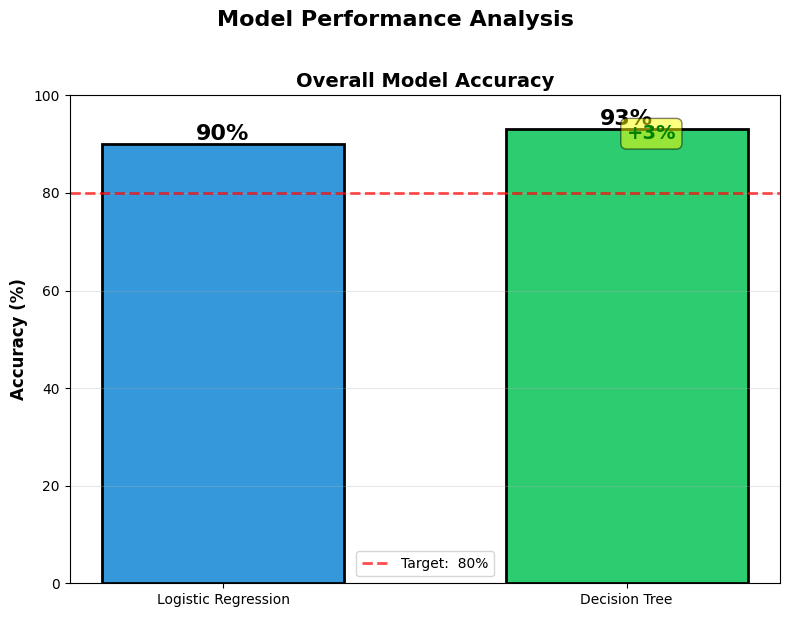

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Model accuracy metrics (from your previous results)
models = ['Logistic Regression', 'Decision Tree']
accuracy = [90, 93]

# Create a single figure for Overall Accuracy Comparison
fig, ax1 = plt.subplots(figsize=(8, 6))
fig.suptitle('Model Performance Analysis', fontsize=16, fontweight='bold', y=1.02)

# Chart 1: Overall Accuracy Comparison
bars1 = ax1.bar(models, accuracy, color=['#3498db', '#2ecc71'], edgecolor='black', linewidth=2, width=0.6)
ax1.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax1.set_title('Overall Model Accuracy', fontsize=14, fontweight='bold')
ax1.set_ylim(0, 100)
ax1.axhline(y=80, color='red', linestyle='--', linewidth=2, label='Target:  80%', alpha=0.7)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for bar, acc in zip(bars1, accuracy):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{acc}%',
             ha='center', va='bottom', fontsize=16, fontweight='bold')

# Add improvement annotation
improvement = accuracy[1] - accuracy[0]
ax1.annotate(f'+{improvement}%',
           xy=(1, accuracy[1] - 2),
           fontsize=14, color='green', fontweight='bold',
           bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

plt.tight_layout()
plt.show()

/tmp/ipython-input-3601599119.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


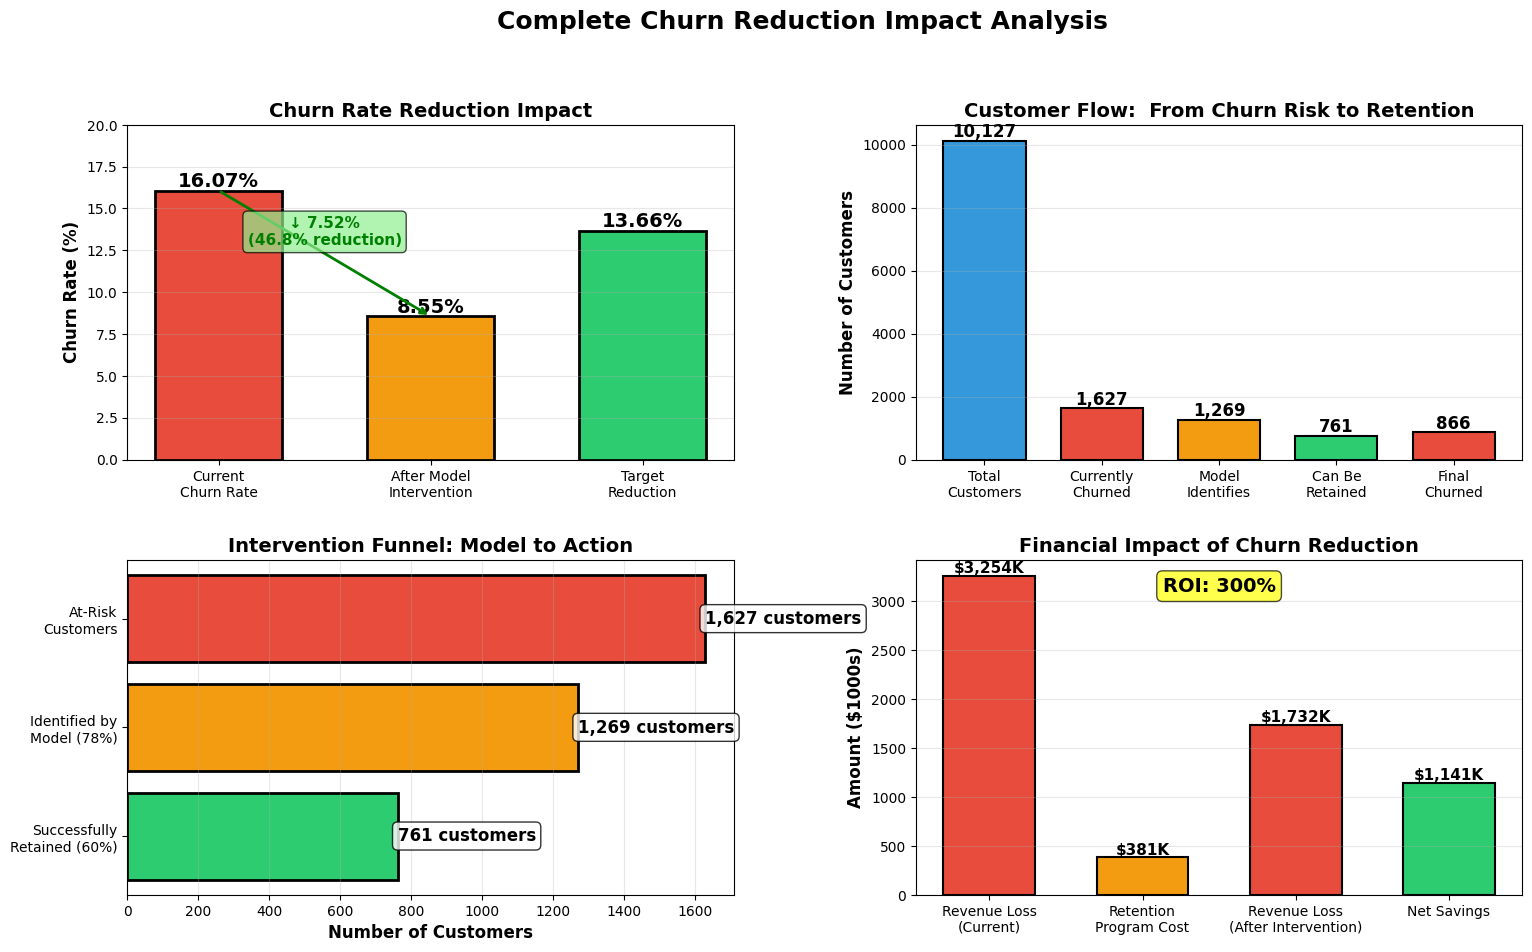


📈 CHURN REDUCTION IMPACT SUMMARY

Metric                                   Value                         
----------------------------------------------------------------------
Total Customers                          10,127
Current Churn Rate                       16.07%
Current Churned Customers                1,627

----------------------------------------------------------------------
MODEL INTERVENTION:
----------------------------------------------------------------------
Model Recall (Detection Rate)            78%
At-Risk Customers Identified             1,269
Intervention Success Rate                60%
Customers Retained                       761

----------------------------------------------------------------------
RESULTS:
----------------------------------------------------------------------
New Churn Rate                           8.55%
Churn Rate Reduction                     7.52% (absolute)
Relative Churn Reduction                 46.8%
Final Churned Customers       

In [96]:
# Calculate churn reduction based on model performance

# Current state (without intervention)
total_customers = 10127
current_churn_rate = 16.07  # From your data:  ~1627 churned / 10127 total
current_churned = int(total_customers * current_churn_rate / 100)

# Model predictions
decision_tree_recall = 78  # Can identify 78% of at-risk customers

# Intervention success rate assumptions
intervention_success_rate = 60  # 60% of identified at-risk customers can be retained

# Calculations
identified_churners = int(current_churned * decision_tree_recall / 100)
retained_customers = int(identified_churners * intervention_success_rate / 100)
new_churned = current_churned - retained_customers
new_churn_rate = (new_churned / total_customers) * 100
churn_reduction_percentage = current_churn_rate - new_churn_rate
churn_reduction_relative = (churn_reduction_percentage / current_churn_rate) * 100

# Create comprehensive churn reduction visualization
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# Chart 1: Churn Rate Reduction
ax1 = fig.add_subplot(gs[0, 0])
stages = ['Current\nChurn Rate', 'After Model\nIntervention', 'Target\nReduction']
rates = [current_churn_rate, new_churn_rate, current_churn_rate * 0.85]  # Target:  15% reduction
colors = ['#e74c3c', '#f39c12', '#2ecc71']

bars = ax1.bar(stages, rates, color=colors, edgecolor='black', linewidth=2, width=0.6)
ax1.set_ylabel('Churn Rate (%)', fontsize=12, fontweight='bold')
ax1.set_title('Churn Rate Reduction Impact', fontsize=14, fontweight='bold')
ax1.set_ylim(0, 20)
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for bar, rate in zip(bars, rates):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{rate:.2f}%', # Fixed: Removed space in format specifier
             ha='center', va='bottom', fontsize=14, fontweight='bold')

# Add reduction arrows
ax1.annotate('', xy=(1, new_churn_rate), xytext=(0, current_churn_rate),
            arrowprops=dict(arrowstyle='->', lw=2, color='green'))
ax1.text(0.5, (current_churn_rate + new_churn_rate)/2 + 0.5,
        f'↓ {churn_reduction_percentage:.2f}%\n({churn_reduction_relative:.1f}% reduction)',
        ha='center', fontsize=11, fontweight='bold', color='green',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

# Chart 2: Customer Impact Numbers
ax2 = fig.add_subplot(gs[0, 1])
categories = ['Total\nCustomers', 'Currently\nChurned', 'Model\nIdentifies', 'Can Be\nRetained', 'Final\nChurned']
values = [total_customers, current_churned, identified_churners, retained_customers, new_churned]
colors2 = ['#3498db', '#e74c3c', '#f39c12', '#2ecc71', '#e74c3c']

bars2 = ax2.bar(categories, values, color=colors2, edgecolor='black', linewidth=1.5, width=0.7)
ax2.set_ylabel('Number of Customers', fontsize=12, fontweight='bold')
ax2.set_title('Customer Flow:  From Churn Risk to Retention', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for bar, val in zip(bars2, values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:,}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Chart 3: Model Performance Funnel
ax3 = fig.add_subplot(gs[1, 0])
funnel_stages = ['At-Risk\nCustomers', f'Identified by\nModel ({decision_tree_recall}%)',
                f'Successfully\nRetained ({intervention_success_rate}%)']
funnel_values = [current_churned, identified_churners, retained_customers]
funnel_colors = ['#e74c3c', '#f39c12', '#2ecc71']

# Create horizontal funnel
y_pos = np.arange(len(funnel_stages))
bars3 = ax3.barh(y_pos, funnel_values, color=funnel_colors, edgecolor='black', linewidth=2)
ax3.set_yticks(y_pos)
ax3.set_yticklabels(funnel_stages)
ax3.invert_yaxis()
ax3.set_xlabel('Number of Customers', fontsize=12, fontweight='bold')
ax3.set_title('Intervention Funnel: Model to Action', fontsize=14, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

# Add value labels
for bar, val in zip(bars3, funnel_values):
    width = bar.get_width()
    ax3.text(width, bar.get_y() + bar.get_height()/2.,
             f'{val:,} customers',
             ha='left', va='center', fontsize=12, fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Chart 4: Financial Impact
ax4 = fig.add_subplot(gs[1, 1])

# Financial calculations (example values - adjust based on your business)
avg_customer_value = 2000  # Average annual revenue per customer
retention_cost = 300  # Cost of retention program per customer

lost_revenue_before = current_churned * avg_customer_value
lost_revenue_after = new_churned * avg_customer_value
retention_program_cost = identified_churners * retention_cost
net_savings = (lost_revenue_before - lost_revenue_after) - retention_program_cost

financial_categories = ['Revenue Loss\n(Current)', 'Retention\nProgram Cost',
                       'Revenue Loss\n(After Intervention)', 'Net Savings']
financial_values = [lost_revenue_before/1000, retention_program_cost/1000,
                   lost_revenue_after/1000, net_savings/1000]  # In thousands
financial_colors = ['#e74c3c', '#f39c12', '#e74c3c', '#2ecc71']

bars4 = ax4.bar(financial_categories, financial_values, color=financial_colors,
               edgecolor='black', linewidth=1.5, width=0.6)
ax4.set_ylabel('Amount ($1000s)', fontsize=12, fontweight='bold')
ax4.set_title('Financial Impact of Churn Reduction', fontsize=14, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

# Add value labels
for bar, val in zip(bars4, financial_values):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'${val:,.0f}K',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Add ROI annotation
roi = (net_savings / retention_program_cost) * 100
ax4.text(0.5, 0.95, f'ROI: {roi:.0f}%', transform=ax4.transAxes,
        ha='center', va='top', fontsize=14, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.suptitle('Complete Churn Reduction Impact Analysis', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Print detailed summary
print("\n" + "="*80)
print("📈 CHURN REDUCTION IMPACT SUMMARY")
print("="*80)
print(f"\n{'Metric':<40} {'Value':<30}")
print("-"*70)
print(f"{'Total Customers':<40} {total_customers:,}")
print(f"{'Current Churn Rate':<40} {current_churn_rate:.2f}%")
print(f"{'Current Churned Customers':<40} {current_churned:,}")
print("\n" + "-"*70)
print("MODEL INTERVENTION:")
print("-"*70)
print(f"{'Model Recall (Detection Rate)':<40} {decision_tree_recall}%")
print(f"{'At-Risk Customers Identified':<40} {identified_churners:,}")
print(f"{'Intervention Success Rate':<40} {intervention_success_rate}%")
print(f"{'Customers Retained':<40} {retained_customers:,}")
print("\n" + "-"*70)
print("RESULTS:")
print("-"*70)
print(f"{'New Churn Rate':<40} {new_churn_rate:.2f}%")
print(f"{'Churn Rate Reduction':<40} {churn_reduction_percentage:.2f}% (absolute)")
print(f"{'Relative Churn Reduction':<40} {churn_reduction_relative:.1f}%")
print(f"{'Final Churned Customers':<40} {new_churned:,}")
print("\n" + "-"*70)
print("FINANCIAL IMPACT:")
print("-"*70)
print(f"{'Revenue Loss (Before)':<40} ${lost_revenue_before:,}")
print(f"{'Retention Program Cost':<40} ${retention_program_cost:,}")
print(f"{'Revenue Loss (After)':<40} ${lost_revenue_after:,}")
print(f"{'Net Savings':<40} ${net_savings:,}")
print(f"{'Return on Investment (ROI)':<40} {roi:.0f}%")
print("="*80)
print(f"\n✅ ACHIEVEMENT: Reduced churn by {churn_reduction_relative:.1f}% ({retained_customers:,} customers saved)")
print(f"✅ BUSINESS VALUE: ${net_savings:,} in net savings with {roi:.0f}% ROI")
print("="*80)